In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
title = "LQ up 1400 GeV"

In [5]:
##############
# input data #
##############

# b1,b2 -> (pT, eta, phi) from the leading and second b-tagged jets
# tau -> (pT, eta, phi) from the tau
# MET -> (pT, eta, phi) eta = 0 by construction, but phi is important because we have a lot of jets that we do not use
# hadinfo -> (HT, num_jets, num_btag)  HT: sum PT of all the jets, number of jets (b-tag or not), number of b-tagged jets


################
# New Physics: #
################

datFolderNP = '../DATA/signal/dats-LQup-1400GeV/'
k_LQup = 1.8877462860822058
crossfidNP = 0.04185415824*k_LQup

b1_NP = np.loadtxt(datFolderNP + 'b1.dat', delimiter=' ')
b2_NP = np.loadtxt(datFolderNP + 'b2.dat', delimiter=' ')
tau_NP = np.loadtxt(datFolderNP + 'tau.dat', delimiter=' ')
MET_NP = np.loadtxt(datFolderNP + 'MET.dat', delimiter=' ')
hadinfo_NP = np.loadtxt(datFolderNP + 'hadinfo.dat', delimiter=' ')

print('# eventos LQ: ', len(b1_NP))



###############
# Background: #
###############

# tt and fakett

datFolderSM_tt = '../DATA/background/dats-tt/'

k_fakett = 1.1053030485310749
crossfid_fakett = 0.244
k_tt = 1.2593273872014419
crossfid_tt = (7.74198*k_tt) + (crossfid_fakett * k_fakett)

b1_SM_tt = np.loadtxt(datFolderSM_tt + 'b1.dat', delimiter=' ')
b2_SM_tt = np.loadtxt(datFolderSM_tt + 'b2.dat', delimiter=' ')
tau_SM_tt = np.loadtxt(datFolderSM_tt + 'tau.dat', delimiter=' ')
MET_SM_tt = np.loadtxt(datFolderSM_tt + 'MET.dat', delimiter=' ')
hadinfo_SM_tt = np.loadtxt(datFolderSM_tt + 'hadinfo.dat', delimiter=' ')

print('# eventos tt: ', len(b1_SM_tt))


# singlet part 1

datFolderSM_singletP1 = '../DATA/background/dats-singletP1/'
k_singletTOTAL = 3.440676833094312 # it is the total k_singlet
crossfid_singletP1 = 0.632632*k_singletTOTAL

b1_SM_singletP1 = np.loadtxt(datFolderSM_singletP1 + 'b1.dat', delimiter=' ')
b2_SM_singletP1 = np.loadtxt(datFolderSM_singletP1 + 'b2.dat', delimiter=' ')
tau_SM_singletP1 = np.loadtxt(datFolderSM_singletP1 + 'tau.dat', delimiter=' ')
MET_SM_singletP1 = np.loadtxt(datFolderSM_singletP1 + 'MET.dat', delimiter=' ')
hadinfo_SM_singletP1 = np.loadtxt(datFolderSM_singletP1 + 'hadinfo.dat', delimiter=' ')

print('# eventos singlet part 1: ', len(b1_SM_singletP1))


# singlet part 2

datFolderSM_singletP2 = '../DATA/background/dats-singlet-comp/'
k_singletTOTAL = 3.440676833094312 # it is the total k_singlet
crossfid_singletP2 = 0.3182704*k_singletTOTAL

b1_SM_singletP2 = np.loadtxt(datFolderSM_singletP2 + 'b1.dat', delimiter=' ')
b2_SM_singletP2 = np.loadtxt(datFolderSM_singletP2 + 'b2.dat', delimiter=' ')
tau_SM_singletP2 = np.loadtxt(datFolderSM_singletP2 + 'tau.dat', delimiter=' ')
MET_SM_singletP2 = np.loadtxt(datFolderSM_singletP2 + 'MET.dat', delimiter=' ')
hadinfo_SM_singletP2 = np.loadtxt(datFolderSM_singletP2 + 'hadinfo.dat', delimiter=' ')

print('# eventos singlet part 2: ', len(b1_SM_singletP2))


# Wbbjets

datFolderSM_Wbbjets = '../DATA/background/dats-Wbbjets/'
k_wjets = 0.9781509289273502
crossfid_Wbbjets = 1.6542420183645095*k_wjets

b1_SM_Wbbjets = np.loadtxt(datFolderSM_Wbbjets + 'b1.dat', delimiter=' ')
b2_SM_Wbbjets = np.loadtxt(datFolderSM_Wbbjets + 'b2.dat', delimiter=' ')
tau_SM_Wbbjets = np.loadtxt(datFolderSM_Wbbjets + 'tau.dat', delimiter=' ')
MET_SM_Wbbjets = np.loadtxt(datFolderSM_Wbbjets + 'MET.dat', delimiter=' ')
hadinfo_SM_Wbbjets = np.loadtxt(datFolderSM_Wbbjets + 'hadinfo.dat', delimiter=' ')

print('# eventos Wbbjets: ', len(b1_SM_Wbbjets))


# ttW (part of ttV)

datFolderSM_ttW = '../DATA/background/dats-ttW/'
k_ttV = 3.056401327463198 # it is the total ttV
crossfid_ttW = 0.03683196*k_ttV

b1_SM_ttW = np.loadtxt(datFolderSM_ttW + 'b1.dat', delimiter=' ')
b2_SM_ttW = np.loadtxt(datFolderSM_ttW + 'b2.dat', delimiter=' ')
tau_SM_ttW = np.loadtxt(datFolderSM_ttW + 'tau.dat', delimiter=' ')
MET_SM_ttW = np.loadtxt(datFolderSM_ttW + 'MET.dat', delimiter=' ')
hadinfo_SM_ttW = np.loadtxt(datFolderSM_ttW + 'hadinfo.dat', delimiter=' ')

print('# eventos ttW: ', len(b1_SM_ttW))


# ttZ

datFolderSM_ttZ = '../DATA/background/dats-ttZ/'
k_ttV = 3.056401327463198 # it is the total ttV
crossfid_ttZ = 0.0715444*k_ttV

b1_SM_ttZ = np.loadtxt(datFolderSM_ttZ + 'b1.dat', delimiter=' ')
b2_SM_ttZ = np.loadtxt(datFolderSM_ttZ + 'b2.dat', delimiter=' ')
tau_SM_ttZ = np.loadtxt(datFolderSM_ttZ + 'tau.dat', delimiter=' ')
MET_SM_ttZ = np.loadtxt(datFolderSM_ttZ + 'MET.dat', delimiter=' ')
hadinfo_SM_ttZ = np.loadtxt(datFolderSM_ttZ + 'hadinfo.dat', delimiter=' ')

print('# eventos ttZ: ', len(b1_SM_ttZ))


# ttH

datFolderSM_ttH = '../DATA/background/dats-ttH/'
k_ttH = 2.2127445612386474
crossfid_ttH = 0.03630132*k_ttH

b1_SM_ttH = np.loadtxt(datFolderSM_ttH + 'b1.dat', delimiter=' ')
b2_SM_ttH = np.loadtxt(datFolderSM_ttH + 'b2.dat', delimiter=' ')
tau_SM_ttH = np.loadtxt(datFolderSM_ttH + 'tau.dat', delimiter=' ')
MET_SM_ttH = np.loadtxt(datFolderSM_ttH + 'MET.dat', delimiter=' ')
hadinfo_SM_ttH = np.loadtxt(datFolderSM_ttH + 'hadinfo.dat', delimiter=' ')

print('# eventos ttH: ', len(b1_SM_ttH))

# eventos LQ:  506381
# eventos tt:  826022
# eventos singlet part 1:  179677
# eventos singlet part 2:  94219
# eventos Wbbjets:  162448
# eventos ttW:  141919
# eventos ttZ:  16178
# eventos ttH:  12068


In [6]:
# Number of data points (per-class) for the ML classifier
num_data_NP = int(len(b1_NP)-1)
print(' SIGNAL ')
print('# S chosen: ', num_data_NP)



totalcrossSM = crossfid_tt + crossfid_singletP1+crossfid_singletP2 + crossfid_Wbbjets + crossfid_ttW+crossfid_ttZ + crossfid_ttH

num_data_SM_singletP1 = round( num_data_NP * (crossfid_singletP1/totalcrossSM) )
num_data_SM_singletP2 = round( num_data_NP * (crossfid_singletP2/totalcrossSM) )
num_data_SM_Wbbjets = round( num_data_NP * (crossfid_Wbbjets/totalcrossSM) )
num_data_SM_ttW = round( num_data_NP * (crossfid_ttW/totalcrossSM) )
num_data_SM_ttZ = round( num_data_NP * (crossfid_ttZ/totalcrossSM) )
num_data_SM_ttH = round( num_data_NP * (crossfid_ttH/totalcrossSM) )

num_data_SM_tt = num_data_NP - (num_data_SM_singletP1+num_data_SM_singletP2 + num_data_SM_Wbbjets + num_data_SM_ttW+num_data_SM_ttZ + num_data_SM_ttH)

num_data_SM = num_data_SM_tt + num_data_SM_singletP1+num_data_SM_singletP2 + num_data_SM_Wbbjets + num_data_SM_ttW+num_data_SM_ttZ +  num_data_SM_ttH


print('\n BACKGROUND ')
print('# tt chosen: ', num_data_SM_tt)
print('# singletP1 chosen: ', num_data_SM_singletP1)
print('# singletP2 chosen: ', num_data_SM_singletP2)
print('# Wbbjets chosen: ', num_data_SM_Wbbjets)
print('# ttW chosen: ', num_data_SM_ttW)
print('# ttZ chosen: ', num_data_SM_ttZ)
print('# ttH chosen: ', num_data_SM_ttH)

print('\n# total B eventos chosen: ', num_data_SM)



# CHECK IF THE NUMBER OF EVENTS ARE CORRECT
if num_data_SM == num_data_NP and num_data_NP < len(b1_NP) and num_data_SM_tt < len(b1_SM_tt) and num_data_SM_singletP1 < len(b1_SM_singletP1) and num_data_SM_singletP2 < len(b1_SM_singletP2) and num_data_SM_Wbbjets < len(b1_SM_Wbbjets) and num_data_SM_ttW < len(b1_SM_ttW) and num_data_SM_ttZ < len(b1_SM_ttZ) and num_data_SM_ttH < len(b1_SM_ttH):
    print( '\nEverything OK, continue')
else:
    print( '\nThe number of events of each channel not enought, check if you need to generate more')

 SIGNAL 
# S chosen:  506380

 BACKGROUND 
# tt chosen:  331159
# singletP1 chosen:  71943
# singletP2 chosen:  36194
# Wbbjets chosen:  53481
# ttW chosen:  3721
# ttZ chosen:  7227
# ttH chosen:  2655

# total B eventos chosen:  506380

Everything OK, continue


In [7]:
# KEEP ONLY THE NUMBER OF SIGNAL EVENTS THAT WE WILL USE
b1_NP = b1_NP[:num_data_NP]
b2_NP = b2_NP[:num_data_NP]
tau_NP = tau_NP[:num_data_NP]
MET_NP = MET_NP[:num_data_NP]
hadinfo_NP = hadinfo_NP[:num_data_NP]


# CONCATENATE YOUR SELECTED BACKGROUNDS (as many as you want, with the correct proportion)

b1_SM = np.concatenate((b1_SM_tt[:num_data_SM_tt],b1_SM_singletP1[:num_data_SM_singletP1],b1_SM_singletP2[:num_data_SM_singletP2],b1_SM_Wbbjets[:num_data_SM_Wbbjets],b1_SM_ttW[:num_data_SM_ttW],b1_SM_ttZ[:num_data_SM_ttZ],b1_SM_ttH[:num_data_SM_ttH]))
b2_SM = np.concatenate((b2_SM_tt[:num_data_SM_tt],b2_SM_singletP1[:num_data_SM_singletP1],b2_SM_singletP2[:num_data_SM_singletP2],b2_SM_Wbbjets[:num_data_SM_Wbbjets],b2_SM_ttW[:num_data_SM_ttW],b2_SM_ttZ[:num_data_SM_ttZ],b2_SM_ttH[:num_data_SM_ttH]))
tau_SM = np.concatenate((tau_SM_tt[:num_data_SM_tt],tau_SM_singletP1[:num_data_SM_singletP1],tau_SM_singletP2[:num_data_SM_singletP2],tau_SM_Wbbjets[:num_data_SM_Wbbjets],tau_SM_ttW[:num_data_SM_ttW],tau_SM_ttZ[:num_data_SM_ttZ],tau_SM_ttH[:num_data_SM_ttH]))
MET_SM = np.concatenate((MET_SM_tt[:num_data_SM_tt],MET_SM_singletP1[:num_data_SM_singletP1],MET_SM_singletP2[:num_data_SM_singletP2],MET_SM_Wbbjets[:num_data_SM_Wbbjets],MET_SM_ttW[:num_data_SM_ttW],MET_SM_ttZ[:num_data_SM_ttZ],MET_SM_ttH[:num_data_SM_ttH]))
hadinfo_SM = np.concatenate((hadinfo_SM_tt[:num_data_SM_tt],hadinfo_SM_singletP1[:num_data_SM_singletP1],hadinfo_SM_singletP2[:num_data_SM_singletP2],hadinfo_SM_Wbbjets[:num_data_SM_Wbbjets],hadinfo_SM_ttW[:num_data_SM_ttW],hadinfo_SM_ttZ[:num_data_SM_ttZ],hadinfo_SM_ttH[:num_data_SM_ttH]))

del b1_SM_tt
del b2_SM_tt
del tau_SM_tt
del MET_SM_tt
del hadinfo_SM_tt

del b1_SM_singletP1
del b2_SM_singletP1
del tau_SM_singletP1
del MET_SM_singletP1
del hadinfo_SM_singletP1

del b1_SM_singletP2
del b2_SM_singletP2
del tau_SM_singletP2
del MET_SM_singletP2
del hadinfo_SM_singletP2

del b1_SM_Wbbjets
del b2_SM_Wbbjets
del tau_SM_Wbbjets
del MET_SM_Wbbjets
del hadinfo_SM_Wbbjets

del b1_SM_ttW
del b2_SM_ttW
del tau_SM_ttW
del MET_SM_ttW
del hadinfo_SM_ttW

del b1_SM_ttZ
del b2_SM_ttZ
del tau_SM_ttZ
del MET_SM_ttZ
del hadinfo_SM_ttZ

del b1_SM_ttH
del b2_SM_ttH
del tau_SM_ttH
del MET_SM_ttH
del hadinfo_SM_ttH

In [8]:
print('# Background events: ', len(b1_SM))
print('# Signal events: ', len(b1_NP))

# Background events:  506380
# Signal events:  506380


### pdfs

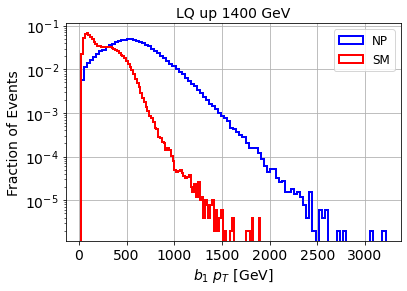

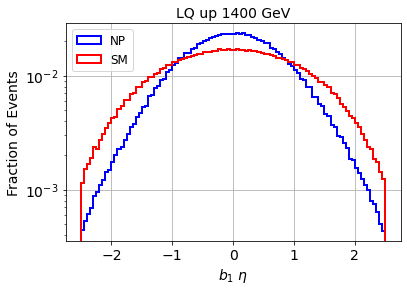

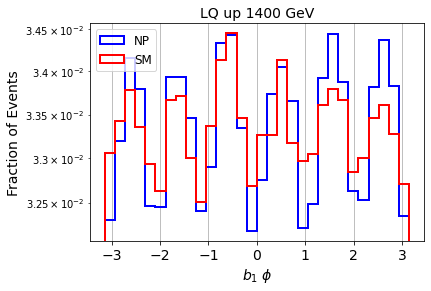

In [9]:
weights = np.ones_like(b1_NP[:,0])/float(len(b1_NP[:,0]))
plt.hist(b1_NP[:,0], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(b1_SM[:,0])/float(len(b1_SM[:,0]))
plt.hist(b1_SM[:,0], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$b_1$ $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()



weights = np.ones_like(b1_NP[:,1])/float(len(b1_NP[:,1]))
plt.hist(b1_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(b1_SM[:,1])/float(len(b1_SM[:,1]))
plt.hist(b1_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$b_1$ $\eta$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()



weights = np.ones_like(b1_NP[:,2])/float(len(b1_NP[:,2]))
plt.hist(b1_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(b1_SM[:,2])/float(len(b1_SM[:,2]))
plt.hist(b1_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$b_1$ $\phi$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()

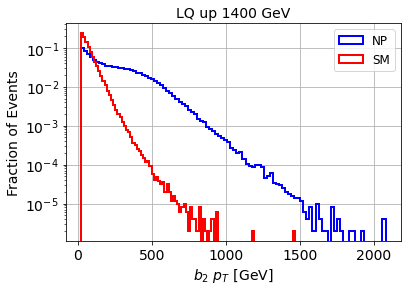

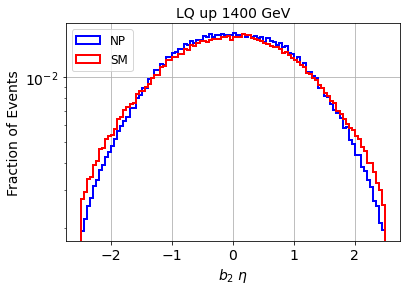

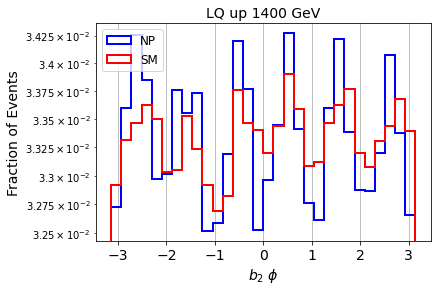

In [10]:
weights = np.ones_like(b2_NP[:,0])/float(len(b2_NP[:,0]))
plt.hist(b2_NP[:,0], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(b2_SM[:,0])/float(len(b2_SM[:,0]))
plt.hist(b2_SM[:,0], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$b_2$ $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()



weights = np.ones_like(b2_NP[:,1])/float(len(b2_NP[:,1]))
plt.hist(b2_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(b2_SM[:,1])/float(len(b2_SM[:,1]))
plt.hist(b2_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$b_2$ $\eta$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()



weights = np.ones_like(b2_NP[:,2])/float(len(b2_NP[:,2]))
plt.hist(b2_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(b2_SM[:,2])/float(len(b2_SM[:,2]))
plt.hist(b2_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$b_2$ $\phi$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()

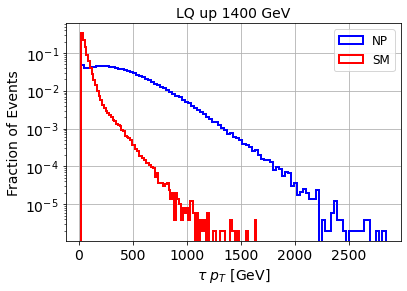

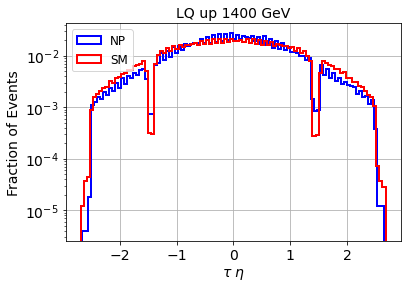

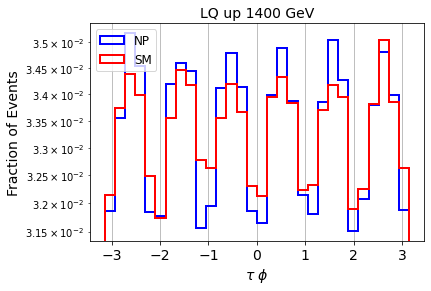

In [11]:
weights = np.ones_like(tau_NP[:,0])/float(len(tau_NP[:,0]))
plt.hist(tau_NP[:,0], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(tau_SM[:,0])/float(len(tau_SM[:,0]))
plt.hist(tau_SM[:,0], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\tau$ $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()



weights = np.ones_like(tau_NP[:,1])/float(len(tau_NP[:,1]))
plt.hist(tau_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(tau_SM[:,1])/float(len(tau_SM[:,1]))
plt.hist(tau_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\tau$ $\eta$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()



weights = np.ones_like(tau_NP[:,2])/float(len(tau_NP[:,2]))
plt.hist(tau_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(tau_SM[:,2])/float(len(tau_SM[:,2]))
plt.hist(tau_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\tau$ $\phi$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()

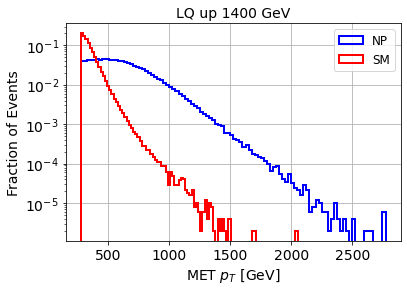

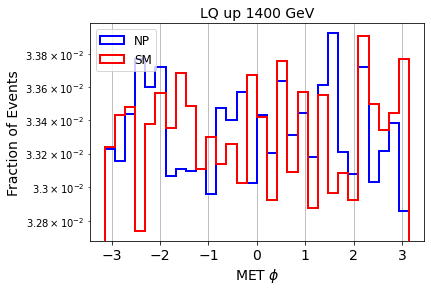

In [12]:
weights = np.ones_like(MET_NP[:,0])/float(len(MET_NP[:,0]))
plt.hist(MET_NP[:,0], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(MET_SM[:,0])/float(len(MET_SM[:,0]))
plt.hist(MET_SM[:,0], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("MET $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()


weights = np.ones_like(MET_NP[:,2])/float(len(MET_NP[:,2]))
plt.hist(MET_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(MET_SM[:,2])/float(len(MET_SM[:,2]))
plt.hist(MET_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("MET $\phi$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()

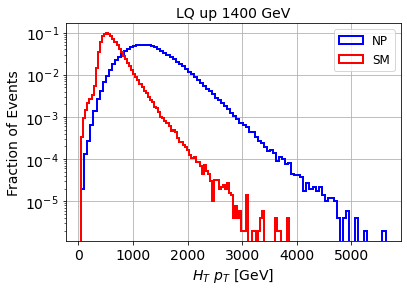

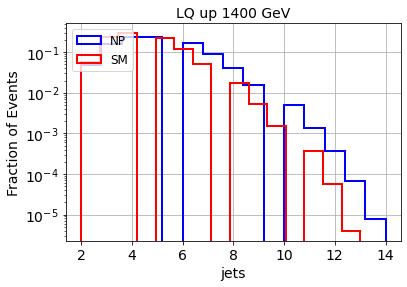

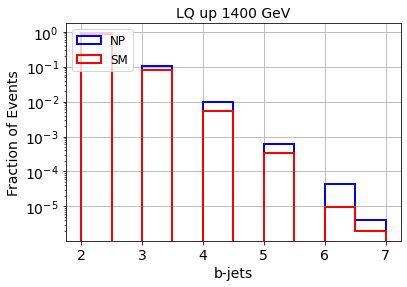

In [13]:
weights = np.ones_like(hadinfo_NP[:,0])/float(len(hadinfo_NP[:,0]))
plt.hist(hadinfo_NP[:,0], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(hadinfo_SM[:,0])/float(len(hadinfo_SM[:,0]))
plt.hist(hadinfo_SM[:,0], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("$H_T$ $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()



weights = np.ones_like(hadinfo_NP[:,1])/float(len(hadinfo_NP[:,1]))
plt.hist(hadinfo_NP[:,1], weights=weights, bins=15, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(hadinfo_SM[:,1])/float(len(hadinfo_SM[:,1]))
plt.hist(hadinfo_SM[:,1], weights=weights, bins=15, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("jets",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()



weights = np.ones_like(hadinfo_NP[:,2])/float(len(hadinfo_NP[:,2]))
plt.hist(hadinfo_NP[:,2], weights=weights, bins=10, lw=2, edgecolor='blue', histtype='step', label="NP")
weights = np.ones_like(hadinfo_SM[:,2])/float(len(hadinfo_SM[:,2]))
plt.hist(hadinfo_SM[:,2], weights=weights, bins=10, lw=2, edgecolor='red', histtype='step', label="SM")

plt.grid()  # Add grid lines
plt.title(title,fontsize=14)  # Titles etc
plt.xlabel("b-jets",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.show()

### Train-test-val Dataset

In [14]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# DATA WITH UNCERTAINTIES
err_pt_tau_SM = 0.1
err_pt_tau_NP = 0.

tau_SM_pt_upB = [i*(1. + err_pt_tau_SM) for i in tau_SM[:,0]]
tau_NP_pt_upB = [i*(1. + err_pt_tau_NP) for i in tau_NP[:,0]]

tau_SM_pt_downB = [i*(1. - err_pt_tau_SM) for i in tau_SM[:,0]]
tau_NP_pt_downB = [i*(1. - err_pt_tau_NP) for i in tau_NP[:,0]]



df = pd.DataFrame()

df['b1-pt']= np.concatenate([b1_SM[:,0],b1_NP[:,0]])
df['b1-eta']= np.concatenate([b1_SM[:,1],b1_NP[:,1]])
df['b1-phi']= np.concatenate([b1_SM[:,2],b1_NP[:,2]])
# remove the used data
del b1_SM
del b1_NP

df['b2-pt']= np.concatenate([b2_SM[:,0],b2_NP[:,0]])
df['b2-eta']= np.concatenate([b2_SM[:,1],b2_NP[:,1]])
df['b2-phi']= np.concatenate([b2_SM[:,2],b2_NP[:,2]])
# remove the used dat
del b2_SM
del b2_NP

df['tau-pt']= np.concatenate([tau_SM[:,0],tau_NP[:,0]])
df['tau-eta']= np.concatenate([tau_SM[:,1],tau_NP[:,1]])
df['tau-phi']= np.concatenate([tau_SM[:,2],tau_NP[:,2]])
# remove the used data
del tau_SM
del tau_NP

df['MET-pt']= np.concatenate([MET_SM[:,0],MET_NP[:,0]])
df['MET-phi']= np.concatenate([MET_SM[:,2],MET_NP[:,2]])
# remove the used data
del MET_SM
del MET_NP

df['HT-pt']= np.concatenate([hadinfo_SM[:,0],hadinfo_NP[:,0]])
df['num-jets']= np.concatenate([hadinfo_SM[:,1],hadinfo_NP[:,1]])
df['num-bjets']= np.concatenate([hadinfo_SM[:,2],hadinfo_NP[:,2]])
# remove the used data
del hadinfo_SM
del hadinfo_NP

df['Y'] = np.concatenate([np.zeros(num_data_SM),np.ones(num_data_NP)])



#df_upB = pd.DataFrame()
df_upB = df.copy()
df_upB['tau-pt'] = np.concatenate([tau_SM_pt_upB,tau_NP_pt_upB])
del tau_SM_pt_upB
del tau_NP_pt_upB

df_downB = df.copy()
df_downB['tau-pt'] = np.concatenate([tau_SM_pt_downB,tau_NP_pt_downB])
del tau_SM_pt_downB
del tau_NP_pt_downB


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets']].values
y_mon = df[['Y']].values


# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            b1-pt    b1-eta    b1-phi     b2-pt    b2-eta    b2-phi    tau-pt  \
0        0.007636  0.639656  0.978199  0.002640  0.475990  0.432368  0.005588   
1        0.017126  0.184874  0.496181  0.021725  0.532013  0.058243  0.001869   
2        0.030900  0.628651  0.564290  0.010287  0.573629  0.929822  0.010331   
3        0.073439  0.276110  0.337842  0.062255  0.332533  0.454806  0.024311   
4        0.036163  0.747299  0.141948  0.010569  0.855342  0.447804  0.005798   
...           ...       ...       ...       ...       ...       ...       ...   
1012755  0.025153  0.567227  0.103278  0.020204  0.735694  0.157543  0.762042   
1012756  0.222115  0.691877  0.669001  0.233511  0.431172  0.384309  0.001528   
1012757  0.155096  0.345138  0.278644  0.109736  0.523810  0.540261  0.060698   
1012758  0.152690  0.601641  0.181572  0.194251  0.569028  0.517187  0.302373   
1012759  0.075617  0.347539  0.179981  0.012917  0.613245  0.143380  0.318925   

          tau-eta   tau-phi

In [15]:
# DATA WITH UNCERTAINTIES +1sigma

# NORMALIZE
df_upB = scaler.fit_transform(df_upB)
df_upB = pd.DataFrame(df_upB,columns=['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets','Y'])


# X and Y for the classifier
X_monupB = df_upB[['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets']].values
y_monupB = df_upB[['Y']].values

del df_upB

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_monupB_aux, X_monupB_test, y_monupB_aux, y_monupB_test = train_test_split(X_monupB,
                                                                y_monupB,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_monupB,
                                                                shuffle=True)


X_monupB_train, X_monupB_val, y_monupB_train, y_monupB_val = train_test_split(X_monupB_aux,
                                                                  y_monupB_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_monupB_aux,
                                                                  shuffle=True)


print('')
print('X_monupB_train : ', X_monupB_train.shape)
print('y_monupB_train : ', y_monupB_train.shape)
print('X_monupB_val : ', X_monupB_val.shape)
print('y_monupB_val : ', y_monupB_val.shape)
print('X_monupB_test : ', X_monupB_test.shape)
print('y_monupB_test : ', y_monupB_test.shape)
print('')


X_monupB_train :  (506379, 14)
y_monupB_train :  (506379, 1)
X_monupB_val :  (168794, 14)
y_monupB_val :  (168794, 1)
X_monupB_test :  (337587, 14)
y_monupB_test :  (337587, 1)



In [16]:
# DATA WITH UNCERTAINTIES -1sigma

# NORMALIZE
df_downB = scaler.fit_transform(df_downB)
df_downB = pd.DataFrame(df_downB,columns=['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets','Y'])


# X and Y for the classifier
X_mondownB = df_downB[['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets']].values
y_mondownB = df_downB[['Y']].values

del df_downB

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mondownB_aux, X_mondownB_test, y_mondownB_aux, y_mondownB_test = train_test_split(X_mondownB,
                                                                y_mondownB,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mondownB,
                                                                shuffle=True)


X_mondownB_train, X_mondownB_val, y_mondownB_train, y_mondownB_val = train_test_split(X_mondownB_aux,
                                                                  y_mondownB_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mondownB_aux,
                                                                  shuffle=True)


print('')
print('X_mondownB_train : ', X_mondownB_train.shape)
print('y_mondownB_train : ', y_mondownB_train.shape)
print('X_mondownB_val : ', X_mondownB_val.shape)
print('y_mondownB_val : ', y_mondownB_val.shape)
print('X_mondownB_test : ', X_mondownB_test.shape)
print('y_mondownB_test : ', y_mondownB_test.shape)
print('')


X_mondownB_train :  (506379, 14)
y_mondownB_train :  (506379, 1)
X_mondownB_val :  (168794, 14)
y_mondownB_val :  (168794, 1)
X_mondownB_test :  (337587, 14)
y_mondownB_test :  (337587, 1)



### XGBoost (per-event)

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.61423	validation_1-logloss:0.61409
[1]	validation_0-logloss:0.54910	validation_1-logloss:0.54908
[2]	validation_0-logloss:0.49510	validation_1-logloss:0.49489
[3]	validation_0-logloss:0.44930	validation_1-logloss:0.44912
[4]	validation_0-logloss:0.41008	validation_1-logloss:0.41004
[5]	validation_0-logloss:0.37645	validation_1-logloss:0.37641
[6]	validation_0-logloss:0.34740	validation_1-logloss:0.34729
[7]	validation_0-logloss:0.32211	validation_1-logloss:0.32206
[8]	validation_0-logloss:0.29997	validation_1-logloss:0.29992
[9]	validation_0-logloss:0.28054	validation_1-logloss:0.28053
[10]	validation_0-logloss:0.26349	validation_1-logloss:0.26350
[11]	validation_0-logloss:0.24843	validation_1-logloss:0.24832
[12]	validation_0-logloss:0.23504	validation_1-logloss:0.23493
[13]	validation_0-logloss:0.22322	validation_1-logloss:0.22314
[14]	validation_0-logloss:0.21276	validation_1-logloss:0.21261
[15]	validation_0-logloss:0.20345	validation_1-logloss:0.20333
[1

[130]	validation_0-logloss:0.10653	validation_1-logloss:0.11061
[131]	validation_0-logloss:0.10645	validation_1-logloss:0.11055
[132]	validation_0-logloss:0.10636	validation_1-logloss:0.11050
[133]	validation_0-logloss:0.10625	validation_1-logloss:0.11041
[134]	validation_0-logloss:0.10620	validation_1-logloss:0.11039
[135]	validation_0-logloss:0.10612	validation_1-logloss:0.11037
[136]	validation_0-logloss:0.10608	validation_1-logloss:0.11035
[137]	validation_0-logloss:0.10603	validation_1-logloss:0.11034
[138]	validation_0-logloss:0.10594	validation_1-logloss:0.11028
[139]	validation_0-logloss:0.10586	validation_1-logloss:0.11025
[140]	validation_0-logloss:0.10578	validation_1-logloss:0.11020
[141]	validation_0-logloss:0.10572	validation_1-logloss:0.11017
[142]	validation_0-logloss:0.10503	validation_1-logloss:0.10949
[143]	validation_0-logloss:0.10496	validation_1-logloss:0.10945
[144]	validation_0-logloss:0.10494	validation_1-logloss:0.10945
[145]	validation_0-logloss:0.10493	valid

[259]	validation_0-logloss:0.08548	validation_1-logloss:0.09311
[260]	validation_0-logloss:0.08546	validation_1-logloss:0.09310
[261]	validation_0-logloss:0.08543	validation_1-logloss:0.09309
[262]	validation_0-logloss:0.08541	validation_1-logloss:0.09309
[263]	validation_0-logloss:0.08537	validation_1-logloss:0.09306
[264]	validation_0-logloss:0.08528	validation_1-logloss:0.09299
[265]	validation_0-logloss:0.08524	validation_1-logloss:0.09297
[266]	validation_0-logloss:0.08520	validation_1-logloss:0.09296
[267]	validation_0-logloss:0.08514	validation_1-logloss:0.09293
[268]	validation_0-logloss:0.08511	validation_1-logloss:0.09293
[269]	validation_0-logloss:0.08503	validation_1-logloss:0.09285
[270]	validation_0-logloss:0.08500	validation_1-logloss:0.09284
[271]	validation_0-logloss:0.08498	validation_1-logloss:0.09284
[272]	validation_0-logloss:0.08497	validation_1-logloss:0.09283
[273]	validation_0-logloss:0.08493	validation_1-logloss:0.09284
[274]	validation_0-logloss:0.08491	valid

[388]	validation_0-logloss:0.07746	validation_1-logloss:0.08799
[389]	validation_0-logloss:0.07744	validation_1-logloss:0.08797
[390]	validation_0-logloss:0.07741	validation_1-logloss:0.08797
[391]	validation_0-logloss:0.07738	validation_1-logloss:0.08796
[392]	validation_0-logloss:0.07720	validation_1-logloss:0.08783
[393]	validation_0-logloss:0.07717	validation_1-logloss:0.08783
[394]	validation_0-logloss:0.07715	validation_1-logloss:0.08783
[395]	validation_0-logloss:0.07712	validation_1-logloss:0.08782
[396]	validation_0-logloss:0.07707	validation_1-logloss:0.08781
[397]	validation_0-logloss:0.07702	validation_1-logloss:0.08778
[398]	validation_0-logloss:0.07698	validation_1-logloss:0.08778
[399]	validation_0-logloss:0.07696	validation_1-logloss:0.08777
[400]	validation_0-logloss:0.07690	validation_1-logloss:0.08774
[401]	validation_0-logloss:0.07687	validation_1-logloss:0.08773
[402]	validation_0-logloss:0.07685	validation_1-logloss:0.08772
[403]	validation_0-logloss:0.07682	valid

[517]	validation_0-logloss:0.07270	validation_1-logloss:0.08592
[518]	validation_0-logloss:0.07267	validation_1-logloss:0.08592
[519]	validation_0-logloss:0.07266	validation_1-logloss:0.08592
[520]	validation_0-logloss:0.07266	validation_1-logloss:0.08592
[521]	validation_0-logloss:0.07265	validation_1-logloss:0.08592
[522]	validation_0-logloss:0.07263	validation_1-logloss:0.08592
[523]	validation_0-logloss:0.07262	validation_1-logloss:0.08592
[524]	validation_0-logloss:0.07261	validation_1-logloss:0.08592
[525]	validation_0-logloss:0.07258	validation_1-logloss:0.08592
[526]	validation_0-logloss:0.07254	validation_1-logloss:0.08590
[527]	validation_0-logloss:0.07251	validation_1-logloss:0.08590
[528]	validation_0-logloss:0.07251	validation_1-logloss:0.08590
[529]	validation_0-logloss:0.07250	validation_1-logloss:0.08590
[530]	validation_0-logloss:0.07247	validation_1-logloss:0.08590
[531]	validation_0-logloss:0.07247	validation_1-logloss:0.08591
[532]	validation_0-logloss:0.07244	valid

[646]	validation_0-logloss:0.06845	validation_1-logloss:0.08394
[647]	validation_0-logloss:0.06842	validation_1-logloss:0.08394
[648]	validation_0-logloss:0.06840	validation_1-logloss:0.08394
[649]	validation_0-logloss:0.06838	validation_1-logloss:0.08394
[650]	validation_0-logloss:0.06836	validation_1-logloss:0.08395
[651]	validation_0-logloss:0.06835	validation_1-logloss:0.08395
[652]	validation_0-logloss:0.06833	validation_1-logloss:0.08394
[653]	validation_0-logloss:0.06831	validation_1-logloss:0.08394
[654]	validation_0-logloss:0.06822	validation_1-logloss:0.08386
[655]	validation_0-logloss:0.06820	validation_1-logloss:0.08386
[656]	validation_0-logloss:0.06797	validation_1-logloss:0.08362
[657]	validation_0-logloss:0.06795	validation_1-logloss:0.08362
[658]	validation_0-logloss:0.06793	validation_1-logloss:0.08362
[659]	validation_0-logloss:0.06790	validation_1-logloss:0.08362
[660]	validation_0-logloss:0.06789	validation_1-logloss:0.08362
[661]	validation_0-logloss:0.06788	valid

[775]	validation_0-logloss:0.06463	validation_1-logloss:0.08242
[776]	validation_0-logloss:0.06461	validation_1-logloss:0.08242
[777]	validation_0-logloss:0.06460	validation_1-logloss:0.08242
[778]	validation_0-logloss:0.06458	validation_1-logloss:0.08242
[779]	validation_0-logloss:0.06457	validation_1-logloss:0.08243
[780]	validation_0-logloss:0.06456	validation_1-logloss:0.08243
[781]	validation_0-logloss:0.06455	validation_1-logloss:0.08243
[782]	validation_0-logloss:0.06454	validation_1-logloss:0.08243
[783]	validation_0-logloss:0.06452	validation_1-logloss:0.08243
[784]	validation_0-logloss:0.06451	validation_1-logloss:0.08243
[785]	validation_0-logloss:0.06450	validation_1-logloss:0.08243
[786]	validation_0-logloss:0.06448	validation_1-logloss:0.08244
[787]	validation_0-logloss:0.06447	validation_1-logloss:0.08244
[788]	validation_0-logloss:0.06446	validation_1-logloss:0.08244
[789]	validation_0-logloss:0.06443	validation_1-logloss:0.08245
[790]	validation_0-logloss:0.06442	valid

[904]	validation_0-logloss:0.06223	validation_1-logloss:0.08217
[905]	validation_0-logloss:0.06221	validation_1-logloss:0.08217
[906]	validation_0-logloss:0.06218	validation_1-logloss:0.08217
[907]	validation_0-logloss:0.06218	validation_1-logloss:0.08218
[908]	validation_0-logloss:0.06216	validation_1-logloss:0.08217
[909]	validation_0-logloss:0.06214	validation_1-logloss:0.08218
[910]	validation_0-logloss:0.06213	validation_1-logloss:0.08217
[911]	validation_0-logloss:0.06211	validation_1-logloss:0.08217
[912]	validation_0-logloss:0.06210	validation_1-logloss:0.08217
[913]	validation_0-logloss:0.06209	validation_1-logloss:0.08218
[914]	validation_0-logloss:0.06208	validation_1-logloss:0.08217
[915]	validation_0-logloss:0.06207	validation_1-logloss:0.08217
[916]	validation_0-logloss:0.06205	validation_1-logloss:0.08217
[917]	validation_0-logloss:0.06202	validation_1-logloss:0.08216
[918]	validation_0-logloss:0.06200	validation_1-logloss:0.08215
[919]	validation_0-logloss:0.06198	valid

[1032]	validation_0-logloss:0.05862	validation_1-logloss:0.08086
[1033]	validation_0-logloss:0.05860	validation_1-logloss:0.08086
[1034]	validation_0-logloss:0.05859	validation_1-logloss:0.08086
[1035]	validation_0-logloss:0.05857	validation_1-logloss:0.08085
[1036]	validation_0-logloss:0.05855	validation_1-logloss:0.08085
[1037]	validation_0-logloss:0.05853	validation_1-logloss:0.08085
[1038]	validation_0-logloss:0.05851	validation_1-logloss:0.08085
[1039]	validation_0-logloss:0.05849	validation_1-logloss:0.08085
[1040]	validation_0-logloss:0.05847	validation_1-logloss:0.08084
[1041]	validation_0-logloss:0.05845	validation_1-logloss:0.08084
[1042]	validation_0-logloss:0.05843	validation_1-logloss:0.08085
[1043]	validation_0-logloss:0.05839	validation_1-logloss:0.08083
[1044]	validation_0-logloss:0.05837	validation_1-logloss:0.08083
[1045]	validation_0-logloss:0.05837	validation_1-logloss:0.08083
[1046]	validation_0-logloss:0.05836	validation_1-logloss:0.08083
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.05638	validation_1-logloss:0.08062
[1160]	validation_0-logloss:0.05636	validation_1-logloss:0.08062
[1161]	validation_0-logloss:0.05636	validation_1-logloss:0.08063
[1162]	validation_0-logloss:0.05636	validation_1-logloss:0.08063
[1163]	validation_0-logloss:0.05634	validation_1-logloss:0.08063
[1164]	validation_0-logloss:0.05633	validation_1-logloss:0.08063
[1165]	validation_0-logloss:0.05633	validation_1-logloss:0.08063
[1166]	validation_0-logloss:0.05632	validation_1-logloss:0.08063
[1167]	validation_0-logloss:0.05632	validation_1-logloss:0.08063
[1168]	validation_0-logloss:0.05631	validation_1-logloss:0.08064
[1169]	validation_0-logloss:0.05629	validation_1-logloss:0.08064
[1170]	validation_0-logloss:0.05629	validation_1-logloss:0.08064
[1171]	validation_0-logloss:0.05629	validation_1-logloss:0.08064
[1172]	validation_0-logloss:0.05629	validation_1-logloss:0.08064
[1173]	validation_0-logloss:0.05627	validation_1-logloss:0.08064
[1174]	validation_0-loglo

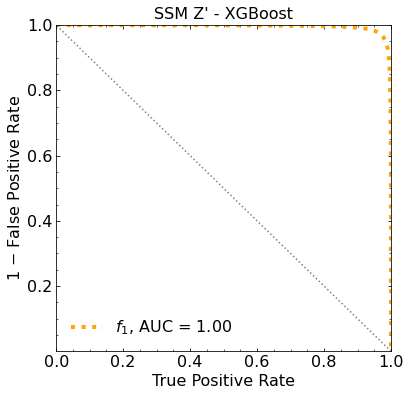

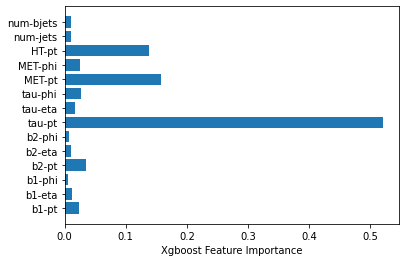

In [17]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




# THIS IS THE DEFAULT FEATURE IMPORTANCE: gain
feature_names = np.array(['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

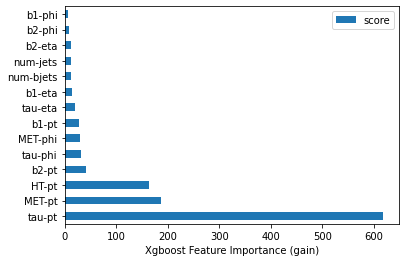

In [18]:
keys = np.array(['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets'])

feature_important = classifier.get_booster().get_score(importance_type='gain')
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh') ## plot top 20 features
plt.xlabel("Xgboost Feature Importance (gain)")
plt.show()

Classification score:


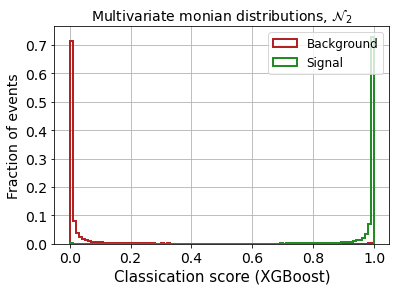

ROC AUC:        0.9954612860593672
ROC AUC upB:    0.9950256700902614
ROC AUC downB:  0.9958930340486642


In [19]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# DATA WITH UNCERTAINTIES +1sigma

# PREDICTIONS
y_pred_xgupB = classifier.predict_proba(X_monupB_test).T[1]


# ROC
fpr_mon_xgupB, tpr_mon_xgupB, _ = roc_curve(y_monupB_test, y_pred_xgupB)
roc_auc_xgupB = auc(fpr_mon_xgupB, tpr_mon_xgupB)

# Outputs for validation data set

pred_XG_SMupB = []
pred_XG_NPupB = []

for i in range(len(y_monupB_test)):
    if y_monupB_test[i] == 0:
        pred_XG_SMupB.append(y_pred_xgupB[i])
    else:
        pred_XG_NPupB.append(y_pred_xgupB[i])




# DATA WITH UNCERTAINTIES -1sigma

# PREDICTIONS
y_pred_xgdownB = classifier.predict_proba(X_mondownB_test).T[1]

# ROC
fpr_mon_xgdownB, tpr_mon_xgdownB, _ = roc_curve(y_mondownB_test, y_pred_xgdownB)
roc_auc_xgdownB = auc(fpr_mon_xgdownB, tpr_mon_xgdownB)

# Outputs for validation data set

pred_XG_SMdownB = []
pred_XG_NPdownB = []

for i in range(len(y_mondownB_test)):
    if y_mondownB_test[i] == 0:
        pred_XG_SMdownB.append(y_pred_xgdownB[i])
    else:
        pred_XG_NPdownB.append(y_pred_xgdownB[i])
        
        
        
print('ROC AUC:       ',roc_auc_xg)
print('ROC AUC upB:   ',roc_auc_xgupB)
print('ROC AUC downB: ',roc_auc_xgdownB)

In [20]:
# we choose the worst one to be conservative

## METHODS

### 0. Ensembles characteristics

In [7]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 2000

# number of expected background events per ensemble
B_expected = round(300 * totalcrossSM)    # luminosity * cross * aceptance
print('B_expected: ', B_expected)

print('S_expected: ', round(300 * crossfidNP))    # luminosity * cross * aceptance
S_expected = [5,10,15,20,25,30]




# SOME USEFUL DERIVATED PARAMETERS:

# S/\sqrt{B}
SB_ratio = [ S_expected[iii]/(1.*B_expected) for iii in range(len(S_expected)) ]

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(S_expected)) ]

B_expected:  4596
S_expected:  24


In [8]:
300 * crossfidNP

23.703009532397086

### 1. BIN LOG LIKELIHOOD

B_expected:  4596
S_expected:  5
S/$\sqrt{B}$:  0.07375305159564095

 If  921  =  278    then the proposed range has to be extended
n_ensembles (actual):  1776

 This may take a bit... 



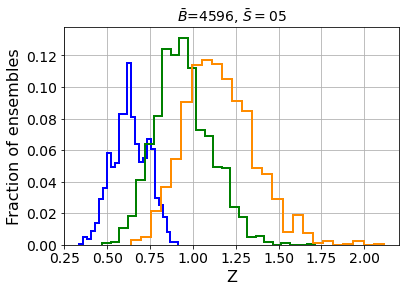

Z_bins_16bins:  0.6315504453325614
Z_bins_16bins_std:  0.10276714396589433
Z_bins_50bins:  0.9244985872354363
Z_bins_50bins_std:  0.16197927659304878
Z_bins_100bins:  1.1374621609051367
Z_bins_100bins_std:  0.20248202171985355

 -------------------------------- 

B_expected:  4596
S_expected:  10
S/$\sqrt{B}$:  0.1475061031912819

 If  921  =  278    then the proposed range has to be extended
n_ensembles (actual):  1776

 This may take a bit... 



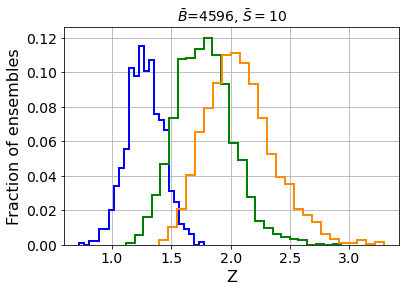

Z_bins_16bins:  1.274718640080863
Z_bins_16bins_std:  0.15198917864515632
Z_bins_50bins:  1.7714861514508284
Z_bins_50bins_std:  0.24140074487837537
Z_bins_100bins:  2.05154444406872
Z_bins_100bins_std:  0.28632195824986306

 -------------------------------- 

B_expected:  4596
S_expected:  15
S/$\sqrt{B}$:  0.22125915478692287

 If  923  =  279    then the proposed range has to be extended
n_ensembles (actual):  1777

 This may take a bit... 



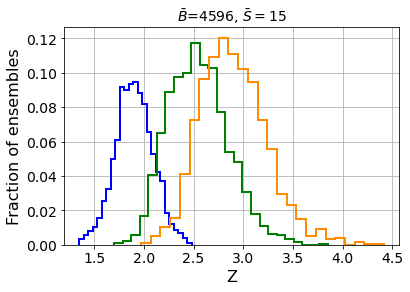

Z_bins_16bins:  1.899934544429604
Z_bins_16bins_std:  0.1893026791215994
Z_bins_50bins:  2.535213524594072
Z_bins_50bins_std:  0.3003639273271917
Z_bins_100bins:  2.8705628688572657
Z_bins_100bins_std:  0.33610240235655514

 -------------------------------- 

B_expected:  4596
S_expected:  20
S/$\sqrt{B}$:  0.2950122063825638

 If  923  =  279    then the proposed range has to be extended
n_ensembles (actual):  1777

 This may take a bit... 



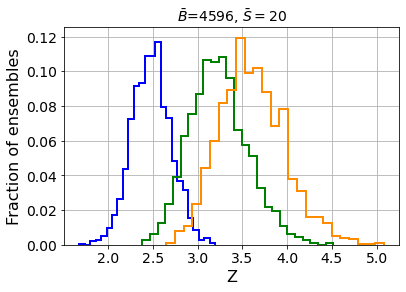

Z_bins_16bins:  2.4809064330072355
Z_bins_16bins_std:  0.21767390837850945
Z_bins_50bins:  3.219091655122849
Z_bins_50bins_std:  0.32506261266089437
Z_bins_100bins:  3.588945411134012
Z_bins_100bins_std:  0.36562782174257036

 -------------------------------- 

B_expected:  4596
S_expected:  25
S/$\sqrt{B}$:  0.3687652579782048

 If  925  =  279    then the proposed range has to be extended
n_ensembles (actual):  1776

 This may take a bit... 



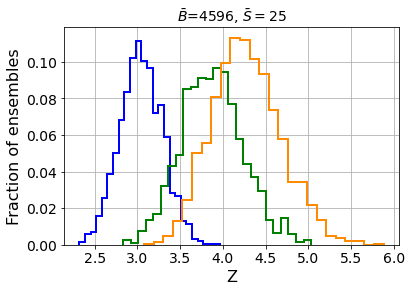

Z_bins_16bins:  3.039491791141205
Z_bins_16bins_std:  0.24755638223928067
Z_bins_50bins:  3.871537392605401
Z_bins_50bins_std:  0.36267244273076915
Z_bins_100bins:  4.258400579772509
Z_bins_100bins_std:  0.4031032506828476

 -------------------------------- 

B_expected:  4596
S_expected:  30
S/$\sqrt{B}$:  0.44251830957384575

 If  925  =  279    then the proposed range has to be extended
n_ensembles (actual):  1775

 This may take a bit... 



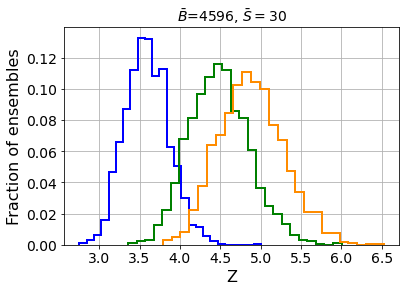

Z_bins_16bins:  3.582589152041532
Z_bins_16bins_std:  0.2710143033793395
Z_bins_50bins:  4.479136087798933
Z_bins_50bins_std:  0.3708610003945656
Z_bins_100bins:  4.876834989251836
Z_bins_100bins_std:  0.4006120547333318

 -------------------------------- 



In [26]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################

store_Z_bins_XG_16bins = []
store_Z_bins_XG_50bins = []
store_Z_bins_XG_100bins = []

store_Z_bins_XG_16bins_std = []
store_Z_bins_XG_50bins_std = []
store_Z_bins_XG_100bins_std = []

# store_Z_bins_XG_16bins_noUnc = []
# store_Z_bins_XG_50bins_noUnc = []
# store_Z_bins_XG_100bins_noUnc = []

# store_Z_bins_XG_16bins_noUnc_std = []
# store_Z_bins_XG_50bins_noUnc_std = []
# store_Z_bins_XG_100bins_noUnc_std = []


indices_B = [i for i in range(len(pred_XG_SM))]
indices_S = [i for i in range(len(pred_XG_NP))]



#################
# Uncertainties #
#################
# Les't use an integer number of possible ensembles
N_ensembles_back = len(pred_XG_SM) / B_expected
N_events_back = N_ensembles_back * B_expected

# Let's find out the expected number of B and S events in each bin:

# 16 bins #

# (upB type) #
# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SMupB], bins=(16), range = [[0,1]])
# now divide by the number of possible ensembles
back_prom_upB = hist_back.T.ravel()/N_ensembles_back

# (downB type) #
# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SMdownB], bins=(16), range = [[0,1]])
# now divide by the number of possible ensembles
back_prom_downB = hist_back.T.ravel()/N_ensembles_back

back_prom_sig_16bins = abs(back_prom_upB-back_prom_downB)/2
# If a bins has no expected background events replace that zero for the minimum B_bin=/=0
# find the minimum
back_prom_sig_16bins_noceros = []
for i in range(len(back_prom_sig_16bins)):
    if back_prom_sig_16bins[i]!=0:
        back_prom_sig_16bins_noceros.append(back_prom_sig_16bins[i])

min_back = min(back_prom_sig_16bins_noceros)

# replace the zeros
for i in range(len(back_prom_sig_16bins)):
    if back_prom_sig_16bins[i]==0:
        back_prom_sig_16bins[i] = min_back
        
        
        
# 50 bins #

# (upB type) #
# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SMupB], bins=(50), range = [[0,1]])
# now divide by the number of possible ensembles
back_prom_upB = hist_back.T.ravel()/N_ensembles_back

# (downB type) #
# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SMdownB], bins=(50), range = [[0,1]])
# now divide by the number of possible ensembles
back_prom_downB = hist_back.T.ravel()/N_ensembles_back

back_prom_sig_50bins = abs(back_prom_upB-back_prom_downB)/2
# If a bins has no expected background events replace that zero for the minimum B_bin=/=0
# find the minimum
back_prom_sig_50bins_noceros = []
for i in range(len(back_prom_sig_50bins)):
    if back_prom_sig_50bins[i]!=0:
        back_prom_sig_50bins_noceros.append(back_prom_sig_50bins[i])

min_back = min(back_prom_sig_50bins_noceros)

# replace the zeros
for i in range(len(back_prom_sig_50bins)):
    if back_prom_sig_50bins[i]==0:
        back_prom_sig_50bins[i] = min_back
        
        
        
        
# 100 bins #

# (upB type) #
# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SMupB], bins=(100), range = [[0,1]])
# now divide by the number of possible ensembles
back_prom_upB = hist_back.T.ravel()/N_ensembles_back

# (downB type) #
# bin the parameter space of all background events
hist_back, binedges_back = np.histogramdd([pred_XG_SMdownB], bins=(100), range = [[0,1]])
# now divide by the number of possible ensembles
back_prom_downB = hist_back.T.ravel()/N_ensembles_back

back_prom_sig_100bins = abs(back_prom_upB-back_prom_downB)/2
# If a bins has no expected background events replace that zero for the minimum B_bin=/=0
# find the minimum
back_prom_sig_100bins_noceros = []
for i in range(len(back_prom_sig_100bins)):
    if back_prom_sig_100bins[i]!=0:
        back_prom_sig_100bins_noceros.append(back_prom_sig_100bins[i])

min_back = min(back_prom_sig_100bins_noceros)

# replace the zeros
for i in range(len(back_prom_sig_100bins)):
    if back_prom_sig_100bins[i]==0:
        back_prom_sig_100bins[i] = min_back








for iii in range(len(S_expected)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######
    
    
    print('\n This may take a bit... \n')
    
    
    #############################
    # NOW LETS APPLY THE METHOD #
    #############################

    Z_bins_16bins_aux = []
    Z_bins_50bins_aux = []
    Z_bins_100bins_aux = []
    
#     Z_bins_16bins_noUnc_aux = []
#     Z_bins_50bins_noUnc_aux = []
#     Z_bins_100bins_noUnc_aux = []
    
    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):
            
            ran_ind_B = np.random.choice(indices_B, list_B_per_ensembles[bb])
            ran_ind_S = np.random.choice(indices_S, list_S_per_ensembles[bb])
            
            # estimate the variance in each bin as ~ (upB - downB)/2 
            
            pred_XG_SM_shuf = []
            
            pred_XG_NP_shuf = []
            
            for ill in ran_ind_B:
                pred_XG_SM_shuf.append(pred_XG_SM[ill])
                
            for ill in ran_ind_S:
                pred_XG_NP_shuf.append(pred_XG_NP[ill])
                
            
            
            ############
            # 16 bins #
            ############

            # Let's find out the expected number of B and S events in each bin:       

            # bin the parameter space of all background events
            hist_back, binedges_back = np.histogramdd([pred_XG_SM_shuf], bins=(16), range = [[0,1]])
            # now divide by the number of possible ensembles
            back_prom = hist_back.T.ravel()

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_shuf], bins=(16), range = [[0,1]])
            sig_prom = hist_sig.T.ravel()



            # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

            # find the minimum
            back_prom_noceros = []
            for i in range(len(back_prom)):
                if back_prom[i]!=0:
                    back_prom_noceros.append(back_prom[i])

            min_back = min(back_prom_noceros)

            # replace the zeros
            for i in range(len(back_prom)):
                if back_prom[i]==0:
                    back_prom[i] = min_back
                    
                    
                    
#             ## then the signif Z^binned-Asimov without uncertainties:
#             Z_bins_16bins_noUnc = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

#             Z_bins_16bins_noUnc_aux.append(Z_bins_16bins_noUnc)
                    

            # then the signif Z^binned-Asimov with uncertainties in the background:

            B_hat = 0.5* ( (back_prom-sig_prom) + ((back_prom+sig_prom)**2. - ( (4.*back_prom*sig_prom*(back_prom_sig_16bins**2))/((back_prom_sig_16bins**2)+back_prom) ))**0.5 )

            Z_bins_16bins_sig = abs( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + B_hat) ) ) - ( (back_prom**2/(back_prom_sig_16bins**2))*np.log(B_hat/back_prom) ) + ( (B_hat-back_prom)*(1+(back_prom/(back_prom_sig_16bins**2))) ) + sig_prom ) )**0.5

            Z_bins_16bins_aux.append(Z_bins_16bins_sig)
            
            
            
            
            
            ############
            # 50 bins #
            ############

            # Let's find out the expected number of B and S events in each bin:

            # bin the parameter space of all background events
            hist_back, binedges_back = np.histogramdd([pred_XG_SM_shuf], bins=(50), range = [[0,1]])
            # now divide by the number of possible ensembles
            back_prom = hist_back.T.ravel()

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_shuf], bins=(50), range = [[0,1]])
            sig_prom = hist_sig.T.ravel()



            # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

            # find the minimum
            back_prom_noceros = []
            for i in range(len(back_prom)):
                if back_prom[i]!=0:
                    back_prom_noceros.append(back_prom[i])

            min_back = min(back_prom_noceros)

            # replace the zeros
            for i in range(len(back_prom)):
                if back_prom[i]==0:
                    back_prom[i] = min_back
                    
                    
                    
#             ## then the signif Z^binned-Asimov without uncertainties:
#             Z_bins_50bins_noUnc = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

#             Z_bins_50bins_noUnc_aux.append(Z_bins_50bins_noUnc)
                    

            # then the signif Z^binned-Asimov with uncertainties in the background:

            B_hat = 0.5* ( (back_prom-sig_prom) + ((back_prom+sig_prom)**2. - ( (4.*back_prom*sig_prom*(back_prom_sig_50bins**2))/((back_prom_sig_50bins**2)+back_prom) ))**0.5 )

            Z_bins_50bins_sig = abs( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + B_hat) ) ) - ( (back_prom**2/(back_prom_sig_50bins**2))*np.log(B_hat/back_prom) ) + ( (B_hat-back_prom)*(1+(back_prom/(back_prom_sig_50bins**2))) ) + sig_prom ) )**0.5

            Z_bins_50bins_aux.append(Z_bins_50bins_sig)
        
        
        
        
        
        
            ############
            # 100 bins #
            ############

            # Let's find out the expected number of B and S events in each bin:

            # bin the parameter space of all background events
            hist_back, binedges_back = np.histogramdd([pred_XG_SM_shuf], bins=(100), range = [[0,1]])
            # now divide by the number of possible ensembles
            back_prom = hist_back.T.ravel()

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_shuf], bins=(100), range = [[0,1]])
            sig_prom = hist_sig.T.ravel()



            # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

            # find the minimum
            back_prom_noceros = []
            for i in range(len(back_prom)):
                if back_prom[i]!=0:
                    back_prom_noceros.append(back_prom[i])

            min_back = min(back_prom_noceros)

            # replace the zeros
            for i in range(len(back_prom)):
                if back_prom[i]==0:
                    back_prom[i] = min_back
                    
                    
                    
#             ## then the signif Z^binned-Asimov without uncertainties:
#             Z_bins_100bins_noUnc = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

#             Z_bins_100bins_noUnc_aux.append(Z_bins_100bins_noUnc)
                    

            # then the signif Z^binned-Asimov with uncertainties in the background:

            B_hat = 0.5* ( (back_prom-sig_prom) + ((back_prom+sig_prom)**2. - ( (4.*back_prom*sig_prom*(back_prom_sig_100bins**2))/((back_prom_sig_100bins**2)+back_prom) ))**0.5 )

            Z_bins_100bins_sig = abs( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + B_hat) ) ) - ( (back_prom**2/(back_prom_sig_100bins**2))*np.log(B_hat/back_prom) ) + ( (B_hat-back_prom)*(1+(back_prom/(back_prom_sig_100bins**2))) ) + sig_prom ) )**0.5

            Z_bins_100bins_aux.append(Z_bins_100bins_sig)
            
    
    
    
  
    # Histogram of q_muhats

    weights = np.ones_like(Z_bins_16bins_aux)/float(len(Z_bins_16bins_aux))
    nMIX, binsMIX, patchesMIX = plt.hist(Z_bins_16bins_aux, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    weights = np.ones_like(Z_bins_50bins_aux)/float(len(Z_bins_50bins_aux))
    nMIX, binsMIX, patchesMIX = plt.hist(Z_bins_50bins_aux, 25, weights=weights, histtype='step', color='green', linewidth=2)
    weights = np.ones_like(Z_bins_100bins_aux)/float(len(Z_bins_100bins_aux))
    nMIX, binsMIX, patchesMIX = plt.hist(Z_bins_100bins_aux, 25, weights=weights, histtype='step', color='darkorange', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Z",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()
    
    
    # 16 bins #
    # Remove nan if any
    Z_bins_16bins_aux = [x for x in Z_bins_16bins_aux if x == x]
    for jk in range(len(Z_bins_16bins_aux)):
        if Z_bins_16bins_aux[jk] < 0:
            Z_bins_16bins_aux[jk] = 0

    Z_bins_16bins = np.median(Z_bins_16bins_aux)   
    store_Z_bins_XG_16bins.append(Z_bins_16bins)
    
    Z_bins_16bins_std = np.std(Z_bins_16bins_aux)   
    store_Z_bins_XG_16bins_std.append(Z_bins_16bins_std)

    print('Z_bins_16bins: ', Z_bins_16bins)
    print('Z_bins_16bins_std: ', Z_bins_16bins_std)

    
#     # Remove nan if any
#     Z_bins_16bins_noUnc_aux = [x for x in Z_bins_16bins_noUnc_aux if x == x]
#     for jk in range(len(Z_bins_16bins_noUnc_aux)):
#         if Z_bins_16bins_noUnc_aux[jk] < 0:
#             Z_bins_16bins_noUnc_aux[jk] = 0

#     Z_bins_16bins_noUnc = np.median(Z_bins_16bins_noUnc_aux)   
#     store_Z_bins_XG_16bins_noUnc.append(Z_bins_16bins_noUnc)
    
#     Z_bins_16bins_noUnc_std = np.std(Z_bins_16bins_noUnc_aux)   
#     store_Z_bins_XG_16bins_noUnc_std.append(Z_bins_16bins_noUnc_std)

#     print('Z_bins_16bins_noUnc: ', Z_bins_16bins_noUnc)
#     print('Z_bins_16bins_noUnc_std: ', Z_bins_16bins_noUnc_std)
    
    
    # 50 bins #
    # Remove nan if any
    Z_bins_50bins_aux = [x for x in Z_bins_50bins_aux if x == x]
    for jk in range(len(Z_bins_50bins_aux)):
        if Z_bins_50bins_aux[jk] < 0:
            Z_bins_50bins_aux[jk] = 0

    Z_bins_50bins = np.median(Z_bins_50bins_aux)   
    store_Z_bins_XG_50bins.append(Z_bins_50bins)
    
    Z_bins_50bins_std = np.std(Z_bins_50bins_aux)   
    store_Z_bins_XG_50bins_std.append(Z_bins_50bins_std)

    print('Z_bins_50bins: ', Z_bins_50bins)
    print('Z_bins_50bins_std: ', Z_bins_50bins_std)
    
    
#     # Remove nan if any
#     Z_bins_50bins_noUnc_aux = [x for x in Z_bins_50bins_noUnc_aux if x == x]
#     for jk in range(len(Z_bins_50bins_noUnc_aux)):
#         if Z_bins_50bins_noUnc_aux[jk] < 0:
#             Z_bins_50bins_noUnc_aux[jk] = 0

#     Z_bins_50bins_noUnc = np.median(Z_bins_50bins_noUnc_aux)   
#     store_Z_bins_XG_50bins_noUnc.append(Z_bins_50bins_noUnc)
    
#     Z_bins_50bins_noUnc_std = np.std(Z_bins_50bins_noUnc_aux)   
#     store_Z_bins_XG_50bins_noUnc_std.append(Z_bins_50bins_noUnc_std)

#     print('Z_bins_50bins_noUnc: ', Z_bins_50bins_noUnc)
#     print('Z_bins_50bins_noUnc_std: ', Z_bins_50bins_noUnc_std)
    
    
    # 100 bins #
    # Remove nan if any
    Z_bins_100bins_aux = [x for x in Z_bins_100bins_aux if x == x]
    for jk in range(len(Z_bins_100bins_aux)):
        if Z_bins_100bins_aux[jk] < 0:
            Z_bins_100bins_aux[jk] = 0

    Z_bins_100bins = np.median(Z_bins_100bins_aux)   
    store_Z_bins_XG_100bins.append(Z_bins_100bins)
    
    Z_bins_100bins_std = np.std(Z_bins_100bins_aux)   
    store_Z_bins_XG_100bins_std.append(Z_bins_100bins_std)

    print('Z_bins_100bins: ', Z_bins_100bins)
    print('Z_bins_100bins_std: ', Z_bins_100bins_std)
    
    
#     # Remove nan if any
#     Z_bins_100bins_noUnc_aux = [x for x in Z_bins_100bins_noUnc_aux if x == x]
#     for jk in range(len(Z_bins_100bins_noUnc_aux)):
#         if Z_bins_100bins_noUnc_aux[jk] < 0:
#             Z_bins_100bins_noUnc_aux[jk] = 0

#     Z_bins_100bins_noUnc = np.median(Z_bins_100bins_noUnc_aux)   
#     store_Z_bins_XG_100bins_noUnc.append(Z_bins_100bins_noUnc)
    
#     Z_bins_100bins_noUnc_std = np.std(Z_bins_100bins_noUnc_aux)   
#     store_Z_bins_XG_100bins_noUnc_std.append(Z_bins_100bins_noUnc_std)

#     print('Z_bins_100bins_noUnc: ', Z_bins_100bins_noUnc)
#     print('Z_bins_100bins_noUnc_std: ', Z_bins_100bins_noUnc_std)

    print('\n -------------------------------- \n')

In [27]:
print(store_Z_bins_XG_16bins)
print(store_Z_bins_XG_50bins)
print(store_Z_bins_XG_100bins)

print(store_Z_bins_XG_16bins_std)
print(store_Z_bins_XG_50bins_std)
print(store_Z_bins_XG_100bins_std)

[0.6315504453325614, 1.274718640080863, 1.899934544429604, 2.4809064330072355, 3.039491791141205, 3.582589152041532]
[0.9244985872354363, 1.7714861514508284, 2.535213524594072, 3.219091655122849, 3.871537392605401, 4.479136087798933]
[1.1374621609051367, 2.05154444406872, 2.8705628688572657, 3.588945411134012, 4.258400579772509, 4.876834989251836]
[0.10276714396589433, 0.15198917864515632, 0.1893026791215994, 0.21767390837850945, 0.24755638223928067, 0.2710143033793395]
[0.16197927659304878, 0.24140074487837537, 0.3003639273271917, 0.32506261266089437, 0.36267244273076915, 0.3708610003945656]
[0.20248202171985355, 0.28632195824986306, 0.33610240235655514, 0.36562782174257036, 0.4031032506828476, 0.4006120547333318]


In [9]:
store_Z_bins_XG_16bins = [0.6315504453325614, 1.274718640080863, 1.899934544429604, 2.4809064330072355, 3.039491791141205, 3.582589152041532]
store_Z_bins_XG_50bins = [0.9244985872354363, 1.7714861514508284, 2.535213524594072, 3.219091655122849, 3.871537392605401, 4.479136087798933]
store_Z_bins_XG_100bins = [1.1374621609051367, 2.05154444406872, 2.8705628688572657, 3.588945411134012, 4.258400579772509, 4.876834989251836]

store_Z_bins_XG_16bins_std = [0.10276714396589433, 0.15198917864515632, 0.1893026791215994, 0.21767390837850945, 0.24755638223928067, 0.2710143033793395]
store_Z_bins_XG_50bins_std = [0.16197927659304878, 0.24140074487837537, 0.3003639273271917, 0.32506261266089437, 0.36267244273076915, 0.3708610003945656]
store_Z_bins_XG_100bins_std =[0.20248202171985355, 0.28632195824986306, 0.33610240235655514, 0.36562782174257036, 0.4031032506828476, 0.4006120547333318]

In [10]:
store_Z_bins_XG_16bins_plus = [i+j for i, j in zip(store_Z_bins_XG_16bins, store_Z_bins_XG_16bins_std)]
store_Z_bins_XG_16bins_min = [i-j for i, j in zip(store_Z_bins_XG_16bins, store_Z_bins_XG_16bins_std)]

store_Z_bins_XG_50bins_plus = [i+j for i, j in zip(store_Z_bins_XG_50bins, store_Z_bins_XG_50bins_std)]
store_Z_bins_XG_50bins_min = [i-j for i, j in zip(store_Z_bins_XG_50bins, store_Z_bins_XG_50bins_std)]

store_Z_bins_XG_100bins_plus = [i+j for i, j in zip(store_Z_bins_XG_100bins, store_Z_bins_XG_100bins_std)]
store_Z_bins_XG_100bins_min = [i-j for i, j in zip(store_Z_bins_XG_100bins, store_Z_bins_XG_100bins_std)]

<ipython-input-11-4a6e58b0e125>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-11-4a6e58b0e125>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)')
<ipython-input-11-4a6e58b0e125>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_100bins, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)')


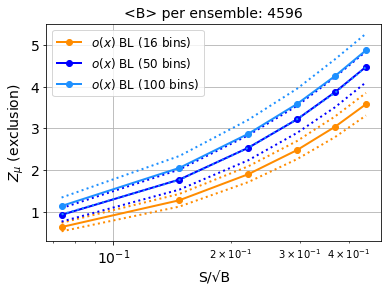

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(S_expected)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(posX, store_Z_bins_XG_16bins_plus, ':', color='darkorange', lw=lw) 
plt.plot(posX, store_Z_bins_XG_16bins_min, ':', color='darkorange', lw=lw) 
plt.plot(posX, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)') 
plt.plot(posX, store_Z_bins_XG_50bins_plus, ':', color='blue', lw=lw) 
plt.plot(posX, store_Z_bins_XG_50bins_min, ':', color='blue', lw=lw) 
plt.plot(posX, store_Z_bins_XG_100bins, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)') 
plt.plot(posX, store_Z_bins_XG_100bins_plus, ':', color='dodgerblue', lw=lw) 
plt.plot(posX, store_Z_bins_XG_100bins_min, ':', color='dodgerblue', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### MLL KDE

#### KDE

/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf           -inf
 12298.67246641 11640.29708657 10829.08971186  9858.24853285
  8747.65127439  7509.99730604  6158.99503476  4703.92286111
  3158.25227735  1536.16768907  -130.26420309 -1774.19187088]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


Background:  KernelDensity(bandwidth=0.005072980090653727, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf           -inf
 12473.11352094 11709.10747491 10824.14855553  9824.68536727
  8709.48207491  7472.95740558  6126.18776608  4685.45192405
  3158.33954245  1553.65177236  -116.93048797 -1765.47664196]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


Signal:  KernelDensity(bandwidth=0.005072980090653727, kernel='epanechnikov')


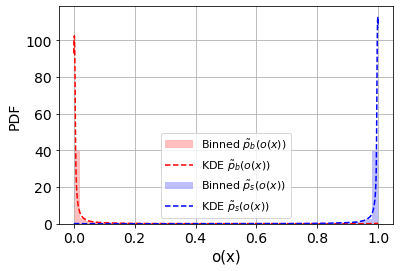

In [30]:
# USE KDE TO ESTIMATE THE CLASSIFIER OUTPUT PDFs



# # FIND THE BANDWIDTH

#SM_bandwidth = 0.0127
#NP_bandwidth = 0.0127

bandwidth = np.logspace(-4.0, 0.05, 20)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:20000]])
print('Background: ', grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:20000]])
print('Signal: ', grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth



# with each calculated bandwidth estimate the pdf with KDE to the classifier output (for background and signal)
# notice: epanechnikov kernel
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])



# range (~between 0 and 1)
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,1000)



# evaluate the densities for each value of s (~bins)
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )



# Normalize to 1
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalize
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP





# plot to check the estimation

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label=r'Binned $\tilde{p}_{b}(o(x))$');
plt.plot(s_vals,dens_bkg,color='red',label=r'KDE $\tilde{p}_{b}(o(x))$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label=r'Binned $\tilde{p}_{s}(o(x))$');
plt.plot(s_vals,dens_sig,color='blue',label=r'KDE $\tilde{p}_{s}(o(x))$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(loc="lower center", fontsize=11, handlelength=2.5)
#plt.title(r'Multivariate Gaussian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2gaussian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()

B_expected:  4596


<ipython-input-31-f9ea0c121e56>:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-31-f9ea0c121e56>:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)')
<ipython-input-31-f9ea0c121e56>:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_100bins, '-ok', color='red', lw=lw, label=r'$o(x)$ BL (100 bins)')


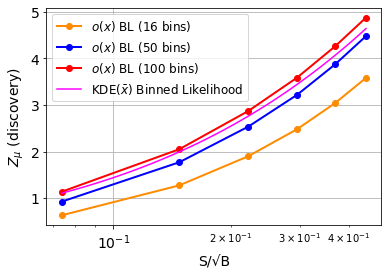

In [31]:
# We can do a quick Z bin-loglikelihood calculation using the computed KDE
# this is to check the KDE here, because we use KDE to avoid binning


# in each ensemble we use B=50k
print('B_expected: ', B_expected)

# values of S / sqrt{B} to test 
soversqrtB = np.linspace(SsqrtB[0],SsqrtB[-1],100)



# Let's find out the expected number of B and S events in each bin:

# total number of B * B_pdf value in each bin * bin size
Bd = B_expected*dens_bkg*(s_vals[1]-s_vals[0])



# If a bins has no expected background events replace that zero for the minimum B_bin=/=0

# find the minimum
Bd_noceros = []
for i in range(len(Bd)):
    if Bd[i]!=0:
        Bd_noceros.append(Bd[i])

min_back = min(Bd_noceros)

# replace the zeros
for i in range(len(Bd)):
    if Bd[i]==0:
        Bd[i] = min_back




# Now calculate Z using the Binned Likelihood formula

Zvals = np.zeros(len(soversqrtB))

for nval, val in enumerate(soversqrtB):
    # S events in each bin: 
    # value of S/sqrt{B} * sqrt{B} * S_pdf value in each bin * bin size
    Sd = val*np.sqrt(B_expected)*dens_sig*(s_vals[1]-s_vals[0])
    
    # Z value:
    #Zvals[nval]= np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Zvals[nval]= np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    
    
    
# PLOT

plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(posX, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)') 
plt.plot(posX, store_Z_bins_XG_100bins, '-ok', color='red', lw=lw, label=r'$o(x)$ BL (100 bins)') 
plt.plot(soversqrtB, Zvals, color='magenta', label=r'KDE$(\bar{x})$ Binned Likelihood') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (discovery)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('Gaussian Example, <B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

#### MLL KDE

In [32]:
# FOR EXCLUSION:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND EVENTS

# FOR DISCOVERY:
# we need to evaluate the KDE densities with the classifier output of BACKGROUND and SIGNAL EVENTS

In [33]:
#################################################
# Uncertainties in tau pT using the dataset upB #
#################################################

KDE_SM_pred_SMupB = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SMupB, np.zeros(len(pred_XG_SMupB)) ]) )
KDE_NP_pred_SMupB = np.exp(kde_sig.score_samples(np.c_[pred_XG_SMupB, np.ones(len(pred_XG_SMupB)) ]) )


# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SMupB / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SMupB / factor_aux_NP

B_expected:  4596
S_expected:  5
S/$\sqrt{B}$:  0.07375305159564095
n_ensembles (initial):  2000

 If  921  =  278    then the proposed range has to be extended
n_ensembles (actual):  1776

 This may take long... 



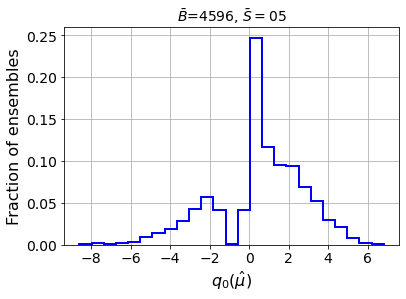

muhat mean:  0.19453828828828829
median q_muhat_KDE:  0.6183137254500979
Z_KDE:  0.7863292729194926
Z_KDE mu=0:  0.6900816629410265
std Z_KDE:  0.8569866866185365
std Z_KDE mu=0:  1.0019461040965316

 -------------------------------- 

B_expected:  4596
S_expected:  10
S/$\sqrt{B}$:  0.1475061031912819
n_ensembles (initial):  2000

 If  921  =  278    then the proposed range has to be extended
n_ensembles (actual):  1776

 This may take long... 



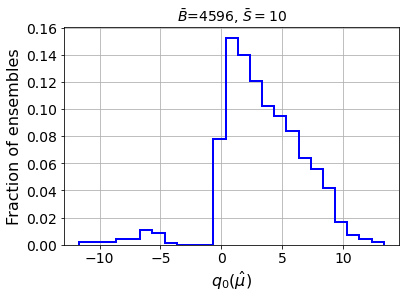

muhat mean:  0.22939189189189188
median q_muhat_KDE:  3.069461197105851
Z_KDE:  1.751987784519587
Z_KDE mu=0:  1.7106125352781283
std Z_KDE:  0.8058791049887851
std Z_KDE mu=0:  0.8899509759993577

 -------------------------------- 

B_expected:  4596
S_expected:  15
S/$\sqrt{B}$:  0.22125915478692287
n_ensembles (initial):  2000

 If  923  =  279    then the proposed range has to be extended
n_ensembles (actual):  1777

 This may take long... 



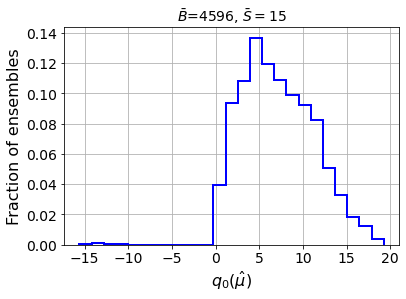

muhat mean:  0.17402926280247608
median q_muhat_KDE:  6.709952216301925
Z_KDE:  2.5903575460352815
Z_KDE mu=0:  2.5649150468822643
std Z_KDE:  0.7797286446448369
std Z_KDE mu=0:  0.8881151161209159

 -------------------------------- 

B_expected:  4596
S_expected:  20
S/$\sqrt{B}$:  0.2950122063825638
n_ensembles (initial):  2000

 If  923  =  279    then the proposed range has to be extended
n_ensembles (actual):  1777

 This may take long... 



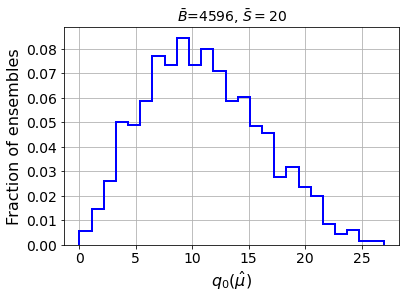

muhat mean:  0.14437253798536862
median q_muhat_KDE:  10.608793790657245
Z_KDE:  3.2571143349070883
Z_KDE mu=0:  3.230116692997711
std Z_KDE:  0.7847792827951184
std Z_KDE mu=0:  0.9184370134432184

 -------------------------------- 

B_expected:  4596
S_expected:  25
S/$\sqrt{B}$:  0.3687652579782048
n_ensembles (initial):  2000

 If  925  =  279    then the proposed range has to be extended
n_ensembles (actual):  1776

 This may take long... 



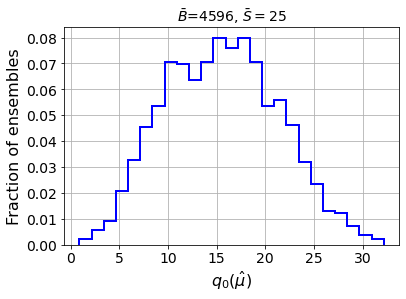

muhat mean:  0.11480855855855858
median q_muhat_KDE:  15.550925590275746
Z_KDE:  3.9434661898228245
Z_KDE mu=0:  3.9307751770261192
std Z_KDE:  0.7360207486347873
std Z_KDE mu=0:  0.8671712791886168

 -------------------------------- 

B_expected:  4596
S_expected:  30
S/$\sqrt{B}$:  0.44251830957384575
n_ensembles (initial):  2000

 If  925  =  279    then the proposed range has to be extended
n_ensembles (actual):  1775

 This may take long... 



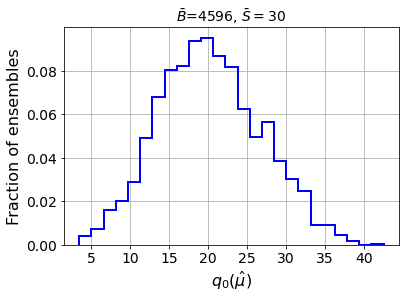

muhat mean:  0.10264788732394367
median q_muhat_KDE:  19.89966773636621
Z_KDE:  4.460904363059829
Z_KDE mu=0:  4.445835071547647
std Z_KDE:  0.7347007595435687
std Z_KDE mu=0:  0.8637175329010065

 -------------------------------- 



In [34]:
store_muhat_mean_MLL_KDE = []

store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_Z_MLL_KDE_std = []
store_Z_MLL_KDE_std_mu0 = []


indices = [i for i in range(len(KDE_NP_pred_SM))]


for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles)


    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')
    
    
    #############################
    # NOW LETS APPLY THE METHOD #
    #############################

    muhat_selected_KDE_list = []
    q_muhat_KDE = []
    q_muhat_KDE_mu0 = []
    
    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):
            
            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)





            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )



            

            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]
            
            sum_muhat_zero = sum ( [(x*1.) / ( (x * 0. * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] )
            sum_muhat_one = sum ( [(x*1.) / ( (x * 1. * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] )

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1., 0.05).tolist()

            muhat_selected_KDE = 0.0

            if sum_muhat_zero < sum_muhat_one and sum_muhat_zero < 1:

                for vv in range(len(muhat_test)):

                    mu_hat_condition_equal_1 = sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] )

                    if mu_hat_condition_equal_1 > 1:
                        muhat_selected_KDE = muhat_test[vv]
                        break

            elif sum_muhat_zero > sum_muhat_one and sum_muhat_zero > 1:

                for vv in range(len(muhat_test)):

                    mu_hat_condition_equal_1 = sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] )

                    if mu_hat_condition_equal_1 < 1:
                        muhat_selected_KDE = muhat_test[vv]
                        break


            muhat_selected_KDE_list.append(muhat_selected_KDE)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            #q_muhat_mu0.append( 2 * ( (-1.*1. * S_expected[iii]) + sum( [np.log( 1 + ( (1.*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat_KDE.append( 2 * ( ( (1.-muhat_selected_KDE) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected_KDE*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            q_muhat_KDE_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat_KDE)/float(len(q_muhat_KDE))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat_KDE, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian
    
    # Remove nan if any
    q_muhat_KDE_mu0 = [x for x in q_muhat_KDE_mu0 if x == x]
    for jk in range(len(q_muhat_KDE_mu0)):
        if q_muhat_KDE_mu0[jk] < 0:
            q_muhat_KDE_mu0[jk] = 0

    q_muhat_KDE_median_mu0 = np.median(q_muhat_KDE_mu0)
    Z_KDE_mu0 = abs(q_muhat_KDE_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)
    
    q_muhat_KDE_std_mu0 = np.std(q_muhat_KDE_mu0)
    Z_KDE_std_mu0 = q_muhat_KDE_std_mu0/(2.*Z_KDE_mu0)
    store_Z_MLL_KDE_std_mu0.append(Z_KDE_std_mu0)
    

    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean_MLL_KDE = np.mean(muhat_selected_KDE_list)
    store_muhat_mean_MLL_KDE.append(muhat_mean_MLL_KDE)

    # Remove nan if any
    q_muhat_KDE = [x for x in q_muhat_KDE if x == x]
    for jk in range(len(q_muhat_KDE)):
        if q_muhat_KDE[jk] < 0:
            q_muhat_KDE[jk] = 0

    q_muhat_KDE_median = np.median(q_muhat_KDE)
    Z_KDE = abs(q_muhat_KDE_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)
    
    q_muhat_KDE_std = np.std(q_muhat_KDE)
    Z_KDE_std = q_muhat_KDE_std/(2.*Z_KDE)
    store_Z_MLL_KDE_std.append(Z_KDE_std)

    print('muhat mean: ', muhat_mean_MLL_KDE)
    print('median q_muhat_KDE: ', q_muhat_KDE_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    print('std Z_KDE: ', Z_KDE_std)
    print('std Z_KDE mu=0: ', Z_KDE_std_mu0)

    print('\n -------------------------------- \n')

In [35]:
print(store_muhat_mean_MLL_KDE)

print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_Z_MLL_KDE_std)
print(store_Z_MLL_KDE_std_mu0)

[0.19453828828828829, 0.22939189189189188, 0.17402926280247608, 0.14437253798536862, 0.11480855855855858, 0.10264788732394367]
[0.7863292729194926, 1.751987784519587, 2.5903575460352815, 3.2571143349070883, 3.9434661898228245, 4.460904363059829]
[0.6900816629410265, 1.7106125352781283, 2.5649150468822643, 3.230116692997711, 3.9307751770261192, 4.445835071547647]
[0.8569866866185365, 0.8058791049887851, 0.7797286446448369, 0.7847792827951184, 0.7360207486347873, 0.7347007595435687]
[1.0019461040965316, 0.8899509759993577, 0.8881151161209159, 0.9184370134432184, 0.8671712791886168, 0.8637175329010065]


In [12]:
# To use if you dont want to run everything again. Its the previous results
store_muhat_mean_MLL_KDE = [0.19453828828828829, 0.22939189189189188, 0.17402926280247608, 0.14437253798536862, 0.11480855855855858, 0.10264788732394367]

store_Z_MLL_KDE = [0.7863292729194926, 1.751987784519587, 2.5903575460352815, 3.2571143349070883, 3.9434661898228245, 4.460904363059829]
store_Z_MLL_KDE_mu0 = [0.6900816629410265, 1.7106125352781283, 2.5649150468822643, 3.230116692997711, 3.9307751770261192, 4.445835071547647]

store_Z_MLL_KDE_std = [0.8569866866185365, 0.8058791049887851, 0.7797286446448369, 0.7847792827951184, 0.7360207486347873, 0.7347007595435687]
store_Z_MLL_KDE_std_mu0 = [1.0019461040965316, 0.8899509759993577, 0.8881151161209159, 0.9184370134432184, 0.8671712791886168, 0.8637175329010065]

In [13]:
store_Z_MLL_KDE_plus = [i+j for i, j in zip(store_Z_MLL_KDE, store_Z_MLL_KDE_std)]
store_Z_MLL_KDE_min = [i-j for i, j in zip(store_Z_MLL_KDE, store_Z_MLL_KDE_std)]

store_Z_MLL_KDE_mu0_plus = [i+j for i, j in zip(store_Z_MLL_KDE_mu0, store_Z_MLL_KDE_std_mu0)]
store_Z_MLL_KDE_mu0_min = [i-j for i, j in zip(store_Z_MLL_KDE_mu0, store_Z_MLL_KDE_std_mu0)]

<ipython-input-14-ba6818921466>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_KDE, '-ok', color='red', lw=lw, label='MLL+KDE')


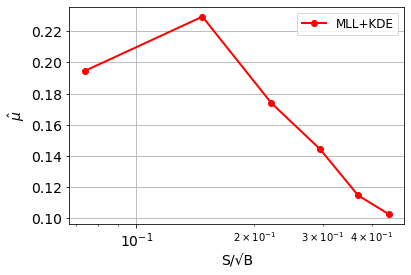

<ipython-input-14-ba6818921466>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=lw, label='MLL+KDE')
<ipython-input-14-ba6818921466>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_plus, ':ok', color='red', lw=lw)
<ipython-input-14-ba6818921466>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_min, ':ok', color='red', lw=lw)
<ipython-input-14-ba6818921466>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(pos

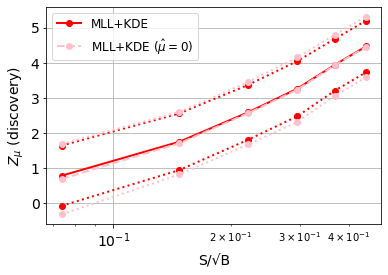

<ipython-input-14-ba6818921466>:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-14-ba6818921466>:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)')
<ipython-input-14-ba6818921466>:67: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_100bins, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)')
<ipython-input-14-ba6818921466>:70: UserWarning: color is redundantly defined by the 'color' keyword argume

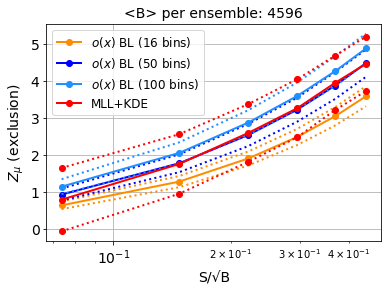

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL_KDE, '-ok', color='red', lw=lw, label='MLL+KDE')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('Gaussian Example, <B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()




plt.figure()
lw = 2

plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=lw, label='MLL+KDE')
plt.plot(posX, store_Z_MLL_KDE_plus, ':ok', color='red', lw=lw)
plt.plot(posX, store_Z_MLL_KDE_min, ':ok', color='red', lw=lw)
plt.plot(posX, store_Z_MLL_KDE_mu0, '--ok', color='pink', lw=lw, label=r'MLL+KDE ($\hat{\mu}=0$)')
plt.plot(posX, store_Z_MLL_KDE_mu0_plus, ':ok', color='pink', lw=lw)
plt.plot(posX, store_Z_MLL_KDE_mu0_min, ':ok', color='pink', lw=lw)

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (discovery)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('Gaussian Example, <B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()




plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(posX, store_Z_bins_XG_16bins_plus, ':', color='darkorange', lw=lw) 
plt.plot(posX, store_Z_bins_XG_16bins_min, ':', color='darkorange', lw=lw) 
plt.plot(posX, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)') 
plt.plot(posX, store_Z_bins_XG_50bins_plus, ':', color='blue', lw=lw) 
plt.plot(posX, store_Z_bins_XG_50bins_min, ':', color='blue', lw=lw) 
plt.plot(posX, store_Z_bins_XG_100bins, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)') 
plt.plot(posX, store_Z_bins_XG_100bins_plus, ':', color='dodgerblue', lw=lw) 
plt.plot(posX, store_Z_bins_XG_100bins_min, ':', color='dodgerblue', lw=lw) 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=lw, label='MLL+KDE')
plt.plot(posX, store_Z_MLL_KDE_plus, ':ok', color='red', lw=lw)
plt.plot(posX, store_Z_MLL_KDE_min, ':ok', color='red', lw=lw)

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

In [15]:
# if Z < 0 -> Z=0

store_Z_bins_XG_16bins = [0 if i < 0 else i for i in store_Z_bins_XG_16bins]
store_Z_bins_XG_16bins_plus = [0 if i < 0 else i for i in store_Z_bins_XG_16bins_plus]
store_Z_bins_XG_16bins_min = [0 if i < 0 else i for i in store_Z_bins_XG_16bins_min]

store_Z_bins_XG_50bins = [0 if i < 0 else i for i in store_Z_bins_XG_50bins]
store_Z_bins_XG_50bins_plus = [0 if i < 0 else i for i in store_Z_bins_XG_50bins_plus]
store_Z_bins_XG_50bins_min = [0 if i < 0 else i for i in store_Z_bins_XG_50bins_min]

store_Z_bins_XG_100bins = [0 if i < 0 else i for i in store_Z_bins_XG_100bins]
store_Z_bins_XG_100bins_plus = [0 if i < 0 else i for i in store_Z_bins_XG_100bins_plus]
store_Z_bins_XG_100bins_min = [0 if i < 0 else i for i in store_Z_bins_XG_100bins_min]

store_Z_MLL_KDE = [0 if i < 0 else i for i in store_Z_MLL_KDE]
store_Z_MLL_KDE_plus = [0 if i < 0 else i for i in store_Z_MLL_KDE_plus]
store_Z_MLL_KDE_min = [0 if i < 0 else i for i in store_Z_MLL_KDE_min]

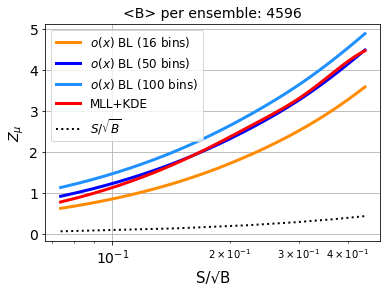

In [16]:
  
# Interpolation, cubic
f_16bins = interp1d(posX, store_Z_bins_XG_16bins, kind='cubic')
f_16bins_plus = interp1d(posX, store_Z_bins_XG_16bins_plus, kind='cubic')
f_16bins_min = interp1d(posX, store_Z_bins_XG_16bins_min, kind='cubic')

f_50bins = interp1d(posX, store_Z_bins_XG_50bins, kind='cubic')
f_50bins_plus = interp1d(posX, store_Z_bins_XG_50bins_plus, kind='cubic')
f_50bins_min = interp1d(posX, store_Z_bins_XG_50bins_min, kind='cubic')

f_100bins = interp1d(posX, store_Z_bins_XG_100bins, kind='cubic')
f_100bins_plus = interp1d(posX, store_Z_bins_XG_100bins_plus, kind='cubic')
f_100bins_min = interp1d(posX, store_Z_bins_XG_100bins_min, kind='cubic')

f_MLL_KDE = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
f_MLL_KDE_plus = interp1d(posX, store_Z_MLL_KDE_plus, kind='cubic')
f_MLL_KDE_min = interp1d(posX, store_Z_MLL_KDE_min, kind='cubic')



# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, f_16bins(plotX), '-', color='darkorange', lw=3, label=r'$o(x)$ BL (16 bins)')
plt.plot(plotX, f_50bins(plotX), '-', color='blue', lw=3, label=r'$o(x)$ BL (50 bins)')
plt.plot(plotX, f_100bins(plotX), '-', color='dodgerblue', lw=3, label=r'$o(x)$ BL (100 bins)')
plt.plot(plotX, f_MLL_KDE(plotX), '-', color='red', lw=3, label='MLL+KDE')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [17]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [18]:
# We need the ratio of the fiducial cross-sections for different values of beta to rescale

beta = [0.1,0.3,0.5,0.7,0.9]

# m_LQ = [ 1200, 1400, 1600, 1800 ]  GeV
ind_mass = 1

fidcross_beta01 = [0.077532, 0.024732, 0.00810288, 0.0029223359999999998]
fidcross_beta03 = [0.1178496, 0.036859619999999996, 0.012126780000000004, 0.0041197740000000005]
fidcross_beta05 = [0.1380368, 0.04174744, 0.01358676, 0.004397004]
fidcross_beta07 = [0.1277332, 0.04176725, 0.01403718, 0.004840911000000001]
fidcross_beta09 = [0.11067599999999998, 0.0343128, 0.012174129999999998, 0.004226528]


S01 = round(300 * crossfidNP) * (fidcross_beta01[ind_mass]/fidcross_beta05[ind_mass])
S03 = round(300 * crossfidNP) * (fidcross_beta03[ind_mass]/fidcross_beta05[ind_mass])
S05 = round(300 * crossfidNP) * (fidcross_beta05[ind_mass]/fidcross_beta05[ind_mass])
S07 = round(300 * crossfidNP) * (fidcross_beta07[ind_mass]/fidcross_beta05[ind_mass])
S09 = round(300 * crossfidNP) * (fidcross_beta09[ind_mass]/fidcross_beta05[ind_mass])


S_exp_LQ = [S01,S03,S05,S07,S09]

print(S_exp_LQ)

[14.218069419346431, 21.190062911642006, 24.0, 24.011388482742895, 19.72593289552605]


In [19]:
# Finally, the value of Z for each value of beta, for this particular LQ

results_16bins_beta = []
results_16bins_beta_plus = []
results_16bins_beta_min = []

results_50bins_beta = []
results_50bins_beta_plus = []
results_50bins_beta_min = []

results_100bins_beta = []
results_100bins_beta_plus = []
results_100bins_beta_min = []

results_MLL_KDE_beta = []
results_MLL_KDE_beta_plus = []
results_MLL_KDE_beta_min = []



for signal in S_exp_LQ:    
    results_16bins_beta.append( f_16bins(signal/(B_expected**0.5)).tolist() )
    results_16bins_beta_plus.append( f_16bins_plus(signal/(B_expected**0.5)).tolist() )
    results_16bins_beta_min.append( f_16bins_min(signal/(B_expected**0.5)).tolist() )
    
    results_50bins_beta.append( f_50bins(signal/(B_expected**0.5)).tolist() )
    results_50bins_beta_plus.append( f_50bins_plus(signal/(B_expected**0.5)).tolist() )
    results_50bins_beta_min.append( f_50bins_min(signal/(B_expected**0.5)).tolist() )
    
    results_100bins_beta.append( f_100bins(signal/(B_expected**0.5)).tolist() )
    results_100bins_beta_plus.append( f_100bins_plus(signal/(B_expected**0.5)).tolist() )
    results_100bins_beta_min.append( f_100bins_min(signal/(B_expected**0.5)).tolist() )
    
    results_MLL_KDE_beta.append( f_MLL_KDE(signal/(B_expected**0.5)).tolist() )
    results_MLL_KDE_beta_plus.append( f_MLL_KDE_plus(signal/(B_expected**0.5)).tolist() )
    results_MLL_KDE_beta_min.append( f_MLL_KDE_min(signal/(B_expected**0.5)).tolist() )

In [20]:
print( results_16bins_beta )
print( results_16bins_beta_plus )
print( results_16bins_beta_min )

print( results_50bins_beta )
print( results_50bins_beta_plus )
print( results_50bins_beta_min )

print( results_100bins_beta )
print( results_100bins_beta_plus )
print( results_100bins_beta_min )

print( results_MLL_KDE_beta )
print( results_MLL_KDE_beta_plus )
print( results_MLL_KDE_beta_min )

np.savetxt('saved-results/LQup1400GeV.txt', [results_16bins_beta,
                                            results_16bins_beta_plus,
                                            results_16bins_beta_min,
                                            results_50bins_beta,
                                            results_50bins_beta_plus,
                                            results_50bins_beta_min,
                                            results_100bins_beta,
                                            results_100bins_beta_plus,
                                            results_100bins_beta_min,
                                            results_MLL_KDE_beta,
                                            results_MLL_KDE_beta_plus,
                                            results_MLL_KDE_beta_min])

[1.8049704098446315, 2.6152452453571993, 2.9290041443149297, 2.9302659095250827, 2.449845480616215]
[1.9892337085460707, 2.839903725783404, 3.1706711555404046, 3.172001040208881, 2.665958930189244]
[1.6207071111431923, 2.390586764930994, 2.6873371330894544, 2.688530778841285, 2.2337320310431865]
[2.4217847510141035, 3.376696308169912, 3.7435830983373526, 3.7450494198249147, 3.1826806970424335]
[2.715737971939661, 3.7096361051519264, 4.098838742774658, 4.1003940576633156, 3.50621798701411]
[2.127831530088546, 3.043756511187898, 3.3883274539000463, 3.3897047819865134, 2.859143407070758]
[2.7497411084416425, 3.751831789703049, 4.127942910471619, 4.129439509233627, 3.551173484553876]
[3.0801070550173186, 4.126319174235612, 4.524534780273628, 4.526112468229554, 3.9149579938092294]
[2.419375161865966, 3.377344405170485, 3.731351040669609, 3.732766550237701, 3.187388975298522]
[2.473013852562003, 3.419522831459638, 3.8099339147121536, 3.811483560985672, 3.2206391982424023]
[3.2534428252923258

<ipython-input-21-d4b64c1e7ff5>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(beta, results_16bins_beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-21-d4b64c1e7ff5>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(beta, results_16bins_beta_plus, ':ok', color='darkorange', lw=lw)
<ipython-input-21-d4b64c1e7ff5>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(beta, results_16bins_beta_min, ':ok', color='darkorange', lw=lw)
<ipython-input-21-d4b64c1e7ff5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword arg

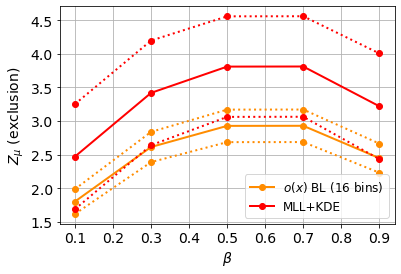

In [21]:
plt.figure()
lw = 2

plt.plot(beta, results_16bins_beta, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(beta, results_16bins_beta_plus, ':ok', color='darkorange', lw=lw) 
plt.plot(beta, results_16bins_beta_min, ':ok', color='darkorange', lw=lw) 

# plt.plot(beta, results_50bins_beta, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)')
# plt.plot(beta, results_50bins_beta_plus, ':ok', color='blue', lw=lw) 
# plt.plot(beta, results_50bins_beta_min, ':ok', color='blue', lw=lw) 

# plt.plot(beta, results_100bins_beta, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)')
# plt.plot(beta, results_100bins_beta_plus, ':ok', color='dodgerblue', lw=lw) 
# plt.plot(beta, results_100bins_beta_min, ':ok', color='dodgerblue', lw=lw) 

plt.plot(beta, results_MLL_KDE_beta, '-ok', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(beta, results_MLL_KDE_beta_plus, ':ok', color='red', lw=lw) 
plt.plot(beta, results_MLL_KDE_beta_min, ':ok', color='red', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()